**2016320187 홍성윤**

 **내용**
---
*   주어진 mushroom 를 통해 식용 버섯과 독버섯을 분류하는 classification model을 설계
*   버섯들의 feature를 통해서 cluster를 만드는 clustering 모델 설계
* cross-validation 을 통한 성능 평가 및 최적의 모델 선정
* feature selection 기법을 통해 중요하지 않은 features drop
* 모든 모델에 대한 분석 및 비교, 요약






## Data Description
해당 데이터는 'The Audubon Society Field Guide to North American Mushrooms (1981). G. H. Lincoff (Pres.), New York: Alfred A. Knopf' 라는 책의 버섯에 대한 데이터이다. 

22개의 feature들은 각각 iris 데이터와 같이 버섯들의 여러 생물학적 특성들을 나타내고 서식지와 같은 정보를 포함한다. 
class 는 edible과 poisonous로 두가지이다.
총 instance 개수는 8124이다.

dataset 선정 이유 : 주어진 dataset에서 식용버섯과 독버섯을 찾아낼 수 있다는 사실이 흥미로웠다. 독버섯이라는 주제 자체가 어릴 때 흥미를 가졌던 주제이기도 하고, 머신러닝이 정말 다양한 분야에서 사용될 수 있다는 것을 보여주는 data인거 같아서 분석하게 되었다.

data-url : http://archive.ics.uci.edu/ml/datasets/Mushroom

### Feature Description
총 22개의 feature가 존재하고 모든 feature는 nominal value이다. data에서는 알파벳 한글자로 해당 feature의 값을 표현하고 있다.

1. **cap-shape**: bell=b, conical=c, convex=x, flat=f, knobbed=k, sunken=s
2. **cap-surface** : fibrous=f, grooves=g, scaly=y, smooth=s
3. **cap**-**color** : brown=n, buff=b, cinnamon=c, gray=g,green=r, pink=p, purple=u, red=e, white=w, yellow=y
4. **bruises?** : bruises=t, no=f
5. **odor** : almond=a, anise=l, creosote=c, fishy=y, foul=f, musty=m, none=n, pungent=p, spicy=s
6. **gill-attachment** : attached=a, descending=d, free=f, notched=n
7. **gill-spacing** : close=c, crowded=w, distant=d
8. **gill-size** : broad=b, narrow=n
9. **gill-color** : black=k, brown=n, buff=b, chocolate=h, gray=g, green=r, orange=o, pink=p, purple=u, red=e, white=w, yellow=y
10. **stalk-shape** : enlarging=e, tapering=t
11. **stalk-root** : bulbous=b, club=c, cup=u, equal=e, rhizomorphs=z, rooted=r, missing=?
12. **stalk-surface-above-ring** : fibrous=f, scaly=y, silky=k, smooth=s
13. **stalk-surface-below-ring** : fibrous=f, scaly=y, silky=k, smooth=s
14. **stalk-color-above-ring** : brown=n, buff=b, cinnamon=c, gray=g, orange=o, pink=p, red=e, white=w, yellow=y
15. **stalk-color-below-ring** : brown=n, buff=b, cinnamon=c, gray=g, orange=o, pink=p, red=e, white=w, yellow=y
16. **veil-type** : partial=p, universal=u
17. **veil-color** : brown=n, orange=o, white=w, yellow=y
18. **ring-number** : none=n, one=o, two=t
19. **ring-type** : cobwebby=c, evanescent=e, flaring=f, large=l, none=n, pendant=p, sheathing=s, zone=z
20. **spore-print-color** : black=k, brown=n, buff=b, chocolate=h, green=r, orange=o, purple=u, white=w, yellow=y
21. **population** : abundant=a, clustered=c, numerous=n, scattered=s, several=v, solitary=y
22. **habitat** : grasses=g,leaves=l, meadows=m, paths=p, urban=u, waste=w, woods=d


# 순서

PART 1. 데이터 불러오기 및 데이터 전처리

PART 2. 모델 생성 및 분석

PART 3. feature selection

PART 4. feature selection 전과 후 모델의 비교

PART 5. 요약

# **PART 1. 데이터 불러오기 및 데이터 전처리** 

## 1. pandas 로 dataset 불러오기

In [339]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [340]:
# 버섯 데이터
dt = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data", 
                  names=['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises?',
                  'odor','gill-attachment', 'gill-spacing', 'gill-size',
                  'gill-color', 'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
                  'stalk-surface-below-ring', 'stalk-color-above-ring', 'stalk-color-below-ring', 'veil-type',
                  'veil-color', 'ring-number', 'ring-type', 'spore-print-color', 
                  'population', 'habitat'])

In [341]:
# 데이터 확인
dt.describe()

,class,cap-shape,cap-surface,cap-color,bruises?,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,2,5,4,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,t,b,s,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,4608,3776,5176,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


## 2. Missing value 제거 

- 'stalk-root'  feature에는 ?로 표시된 missing value가 존재한다. 이를 포함한 instance 들을 모두 drop 한다. 
- missing value를 가진 instance는 2480개이고, 남은 instance는 5644개가 된다.

In [342]:
# stalk-root feature에 ?값있음 이러한 행 삭제
# 조건에 맞는 index 찾고, 그 index를 drop한다.

indexname = dt[dt['stalk-root'] == '?'].index
dt.drop(indexname, inplace=True)

In [343]:
# missing value가 잘 drop 되었다.
dt.describe()

,class,cap-shape,cap-surface,cap-color,bruises?,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,5644,5644,5644,5644,5644,5644,5644,5644,5644,5644,5644,5644,5644,5644,5644,5644,5644,5644,5644,5644,5644,5644,5644
unique,2,6,4,8,2,7,2,2,2,9,2,4,4,4,7,7,1,2,3,4,6,6,6
top,e,x,y,g,t,n,f,c,b,p,t,b,s,s,w,w,p,w,o,p,n,v,d
freq,3488,2840,2220,1696,3184,2776,5626,4620,4940,1384,2880,3776,3736,3544,3136,3088,5644,5636,5488,3488,1920,2160,2492


## 3. data preprocessing


### 3-1. 정수형으로 인코딩
- 각 feature들이 object type 이므로 정수형으로 바꿔준다.
- LableEncoder 사용 

In [344]:
dt.dtypes

class                       object
cap-shape                   object
cap-surface                 object
cap-color                   object
bruises?                    object
odor                        object
gill-attachment             object
gill-spacing                object
gill-size                   object
gill-color                  object
stalk-shape                 object
stalk-root                  object
stalk-surface-above-ring    object
stalk-surface-below-ring    object
stalk-color-above-ring      object
stalk-color-below-ring      object
veil-type                   object
veil-color                  object
ring-number                 object
ring-type                   object
spore-print-color           object
population                  object
habitat                     object
dtype: object

In [345]:
# object type을 정수형으로 인코딩
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

int_dt = dt.apply(le.fit_transform)

In [346]:
# 정수형으로 잘 인코딩 되었다.
int_dt

,class,cap-shape,cap-surface,cap-color,bruises?,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,2,0,2,2,2,5,5,0,0,1,3,1,3,5
1,0,5,2,7,1,0,1,0,0,2,0,1,2,2,5,5,0,0,1,3,2,2,1
2,0,0,2,6,1,3,1,0,0,3,0,1,2,2,5,5,0,0,1,3,2,2,3
3,1,5,3,6,1,6,1,0,1,3,0,2,2,2,5,5,0,0,1,3,1,3,5
4,0,5,2,3,0,5,1,1,0,2,1,2,2,2,5,5,0,0,1,0,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7986,0,0,3,4,0,5,1,0,0,7,0,0,3,3,3,3,0,0,2,3,5,5,4
8001,0,5,3,4,0,5,1,0,0,7,0,0,3,3,3,3,0,0,2,3,5,5,4
8038,0,5,3,3,1,5,1,0,0,7,0,0,2,2,5,5,0,0,2,3,5,5,4
8095,1,5,3,1,0,4,1,0,0,8,0,1,1,3,1,1,0,0,0,2,5,1,0


### 3-2. one-hot 인코딩.
- 모든 feature 값에 대해 정수형 인코딩을 하였다.
- 'bruise?' feature 같은 경우, 두가지 종류의 값이 존재하므로 0과 1로 각각을 표현한다.
- 그런데 대부분의 feature는 두가지 종류 이상의 값을 가진다. 특히 'spore-print-color' feature는 9개의 값을 가진다. 이는 정수로 0부터 8로 표현이 되는데 실제로 각각의 색깔은 어떠한 대소관계가 없지만 정수형으로 인코딩을 한 경우, 0과 8이라는 숫자의 대소 차이가 모델에 반영 될 수 있다. 이를 방지하기 위해 one-hot 인코딩을 통해 데이터를 변환하자
- 'bruise?' 와 같이 두가지 값만 있는 feature는 정수형 인코딩을 한다. ('bruise?', 'gill-size', 'stalk-shape', 'veil-type')

In [347]:
def onehot(data, feature):
  '''
  data의 feature column을 one hot으로 변환해줍니다.
  data: pandas DataFrame
  feature: string, 데이터 프레임의 column 이름
  '''
  return pd.concat([data, pd.get_dummies(data[feature], prefix=feature)], axis=1).drop([feature], axis=1)


In [348]:
# one-hot 인코딩과 label 인코딩
newdt0 = onehot(dt, 'cap-shape')
newdt1 = onehot(newdt0, 'cap-surface')
newdt2 = onehot(newdt1, 'cap-color')
newdt3 = onehot(newdt2, 'odor')
newdt4 = onehot(newdt3, 'gill-attachment')
newdt5 = onehot(newdt4, 'gill-spacing')
newdt6 = onehot(newdt5, 'gill-color')
newdt7 = onehot(newdt6, 'stalk-root')
newdt8 = onehot(newdt7, 'stalk-surface-above-ring')
newdt9 = onehot(newdt8, 'stalk-surface-below-ring')
newdt10 = onehot(newdt9, 'stalk-color-above-ring')
newdt11 = onehot(newdt10, 'stalk-color-below-ring')
newdt12 = onehot(newdt11, 'veil-color')
newdt13 = onehot(newdt12, 'ring-number')
newdt14 = onehot(newdt13, 'ring-type')
newdt15 = onehot(newdt14, 'spore-print-color')
newdt16 = onehot(newdt15, 'population')
newdt = onehot(newdt16, 'habitat')

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

dt = newdt.apply(le.fit_transform)

In [349]:
# 데이터 전처리가 잘 완료되었다.
dt.head(10)

,class,bruises?,gill-size,stalk-shape,veil-type,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,cap-color_b,cap-color_c,cap-color_e,cap-color_g,cap-color_n,cap-color_p,cap-color_w,cap-color_y,odor_a,odor_c,odor_f,odor_l,odor_m,odor_n,odor_p,gill-attachment_a,gill-attachment_f,gill-spacing_c,gill-spacing_w,gill-color_g,gill-color_h,gill-color_k,gill-color_n,gill-color_p,gill-color_r,...,stalk-color-above-ring_c,stalk-color-above-ring_g,stalk-color-above-ring_n,stalk-color-above-ring_p,stalk-color-above-ring_w,stalk-color-above-ring_y,stalk-color-below-ring_b,stalk-color-below-ring_c,stalk-color-below-ring_g,stalk-color-below-ring_n,stalk-color-below-ring_p,stalk-color-below-ring_w,stalk-color-below-ring_y,veil-color_w,veil-color_y,ring-number_n,ring-number_o,ring-number_t,ring-type_e,ring-type_l,ring-type_n,ring-type_p,spore-print-color_h,spore-print-color_k,spore-print-color_n,spore-print-color_r,spore-print-color_u,spore-print-color_w,population_a,population_c,population_n,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u
0,1,1,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
1,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0
2,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
3,1,1,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
4,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
5,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0
6,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
7,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
8,1,1,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
9,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0


## 4. test data와 train data로 나누기
- 전처리가 완료된 data를 test data와 train data로 나눈다. test data의 비중은 30%이다.

In [350]:
# 데이터를 train test 데이터로 나눔
from sklearn.model_selection import train_test_split
y= dt[['class']]
x=dt.drop(columns=['class'])

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.3, random_state=42, )

# **PART 2. 모델 생성 및 비교 분석**

선정한 모델은 총 7개다.
1. **decision tree classifier** 
: 비교적 직관적인 이해가 잘 되는 모델이기 때문에 선정했다. 결정트리 모델을 통해 식용 버섯과 독 버섯을 분류하는데 중요한 특성이 어떤 것인지 확인할 수 있을 것이다.

2. **logistic regression**
 : 버섯 데이터의 클래스는 0과 1 (edible, poison)이다.
linear regression 을 사용하게 되면 예측되는 값의 범위가 [-inf, +inf] 이므로 logistic regression 이 버섯 데이터와 더 적합하다고 판단했다. logistic regression은 0과 1 사이의 확률값을 반환한다.

3. **perceptron** : 버섯 데이터의 linearity 를 확인하고, Multi-Layered-Perceptorn 과의 비교를 하기 위해 선정했다.

4. **MLP Classifier** : non-linear 한 데이터에도 사용가능한 분류기이기 때문에 선정했다. hidden layer와 관련된 파라미터 값에 따라 모델 성능이 어떻게 달라지는지 비교할 수 있다.

5. **KNN Classifier** : 다른 모델과 비교했을 때 성능과 decision boundary 가 어떻게 다른지 확인하기 위해 선정했다.

6. **Random forest** : 앙상블 모델을 적용해보기 위해 선정했다. decision tree와의 비교와 feature의 중요도 확인이 가능하다.

7. **K-means** : 데이터셋에서 클러스터를 만들어내는 클러스터링 알고리즘을 사용해본다. 만들어진 클러스터와 실제 class를 비교해본다.


## 1. Decision Tree Classifier





### 1-1. train data와 test data만을 이용하여 default 모델 생성 및 분석



In [351]:
# decision tree classifier
from sklearn.tree import DecisionTreeClassifier

dt_classifier = DecisionTreeClassifier()

dt_classifier.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [352]:
print(dt_classifier.score(x_test, y_test))

1.0


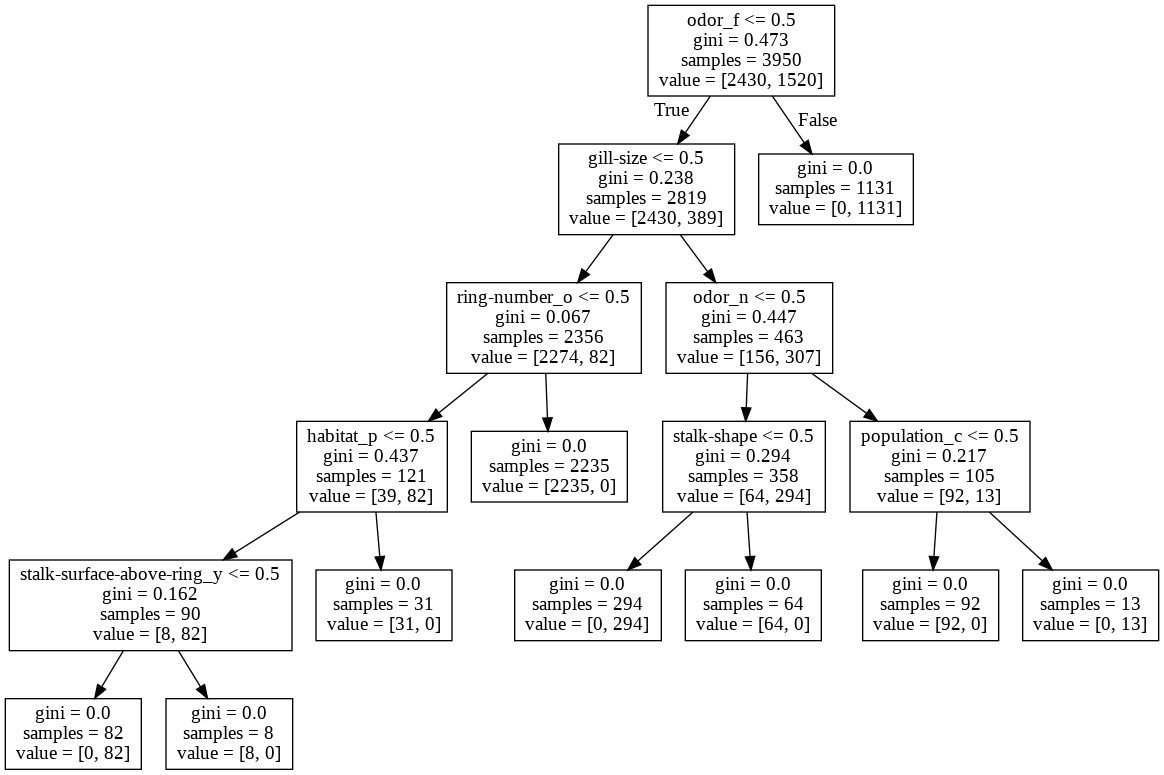

In [353]:
# 아래 코드는 classifier 결정트리를 시각화해줍니다.
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(dt_classifier, feature_names=x_train.columns, out_file=dot_data)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('/tree.png')
Image(graph.create_png())

- decision tree classifier 모델을 default로 생성하고 시각화했다. 
- train data로 훈련하고 test data로 성능을 평가했다. 정확도는 100%이다.
- 정확도가 최대이므로 정확도를 증가시킬 수는 없지만, 높은 정확도를 유지한 채 모델을 단순화 할 수는 있다. validation 과정을 통해 최적의 모델을 선정해보자

### 1-2. validation 과정을 통해 최적의 max_depth, max_features 를 찾아보자
- cross-validation 사용 (k=5)


In [354]:
from sklearn.model_selection import KFold

m_depth_list = [1, 2,3,4,5,6]
m_feature_list = [1,2,3,4,5,6,7,8,9,10]

In [355]:
# max_depth

score = []
for m in m_depth_list:
   
  kf = KFold(n_splits = 5)
  val_accuracy = np.array([])
  for train_index, val_index in  kf.split(x_train):
    x_train_cv, x_val_cv = x_train.iloc[train_index], x_train.iloc[val_index]
    y_train_cv, y_val_cv = y_train.iloc[train_index], y_train.iloc[val_index]

    dtree = DecisionTreeClassifier(max_depth=m )
    dtree.fit(x_train_cv, y_train_cv)
    accuracy = dtree.score(x_val_cv, y_val_cv)
    val_accuracy = np.append(val_accuracy, accuracy)

  mean_score = val_accuracy.mean()
  score.append(mean_score)
print(score)

[0.9015189873417722, 0.939746835443038, 0.970632911392405, 0.9979746835443037, 1.0, 1.0]


- max_depth 값을 수정하면서 validation을 진행하였다. 
- 5-fold cross-validation을 사용하였다.
- max_depth값이 증가하면서 정확도가 증가한다. 기존 default 모델과 같이 max_depth가 5가 될 때 정확도는 최대가 된다.
- max_depth 값이 3 또는 4가 될 때 거의 정확도는 1에 가깝다고 볼 수 있으므로 max_depth가 중요한 상황이라면 max_depth를 줄일 여지가 있다.

In [356]:
# max_feature

score = []
for m in m_feature_list:
   
  kf = KFold(n_splits = 5)
  val_accuracy = np.array([])
  for train_index, val_index in  kf.split(x_train):
    x_train_cv, x_val_cv = x_train.iloc[train_index], x_train.iloc[val_index]
    y_train_cv, y_val_cv = y_train.iloc[train_index], y_train.iloc[val_index]

    dtree = DecisionTreeClassifier(max_features=m )
    dtree.fit(x_train_cv, y_train_cv)
    accuracy = dtree.score(x_val_cv, y_val_cv)
    val_accuracy = np.append(val_accuracy, accuracy)

  mean_score = val_accuracy.mean()
  score.append(mean_score)
print(score)

[0.9984810126582279, 0.9974683544303797, 0.9959493670886076, 0.9967088607594936, 0.9992405063291139, 0.999493670886076, 0.999746835443038, 0.9992405063291139, 0.999746835443038, 1.0]


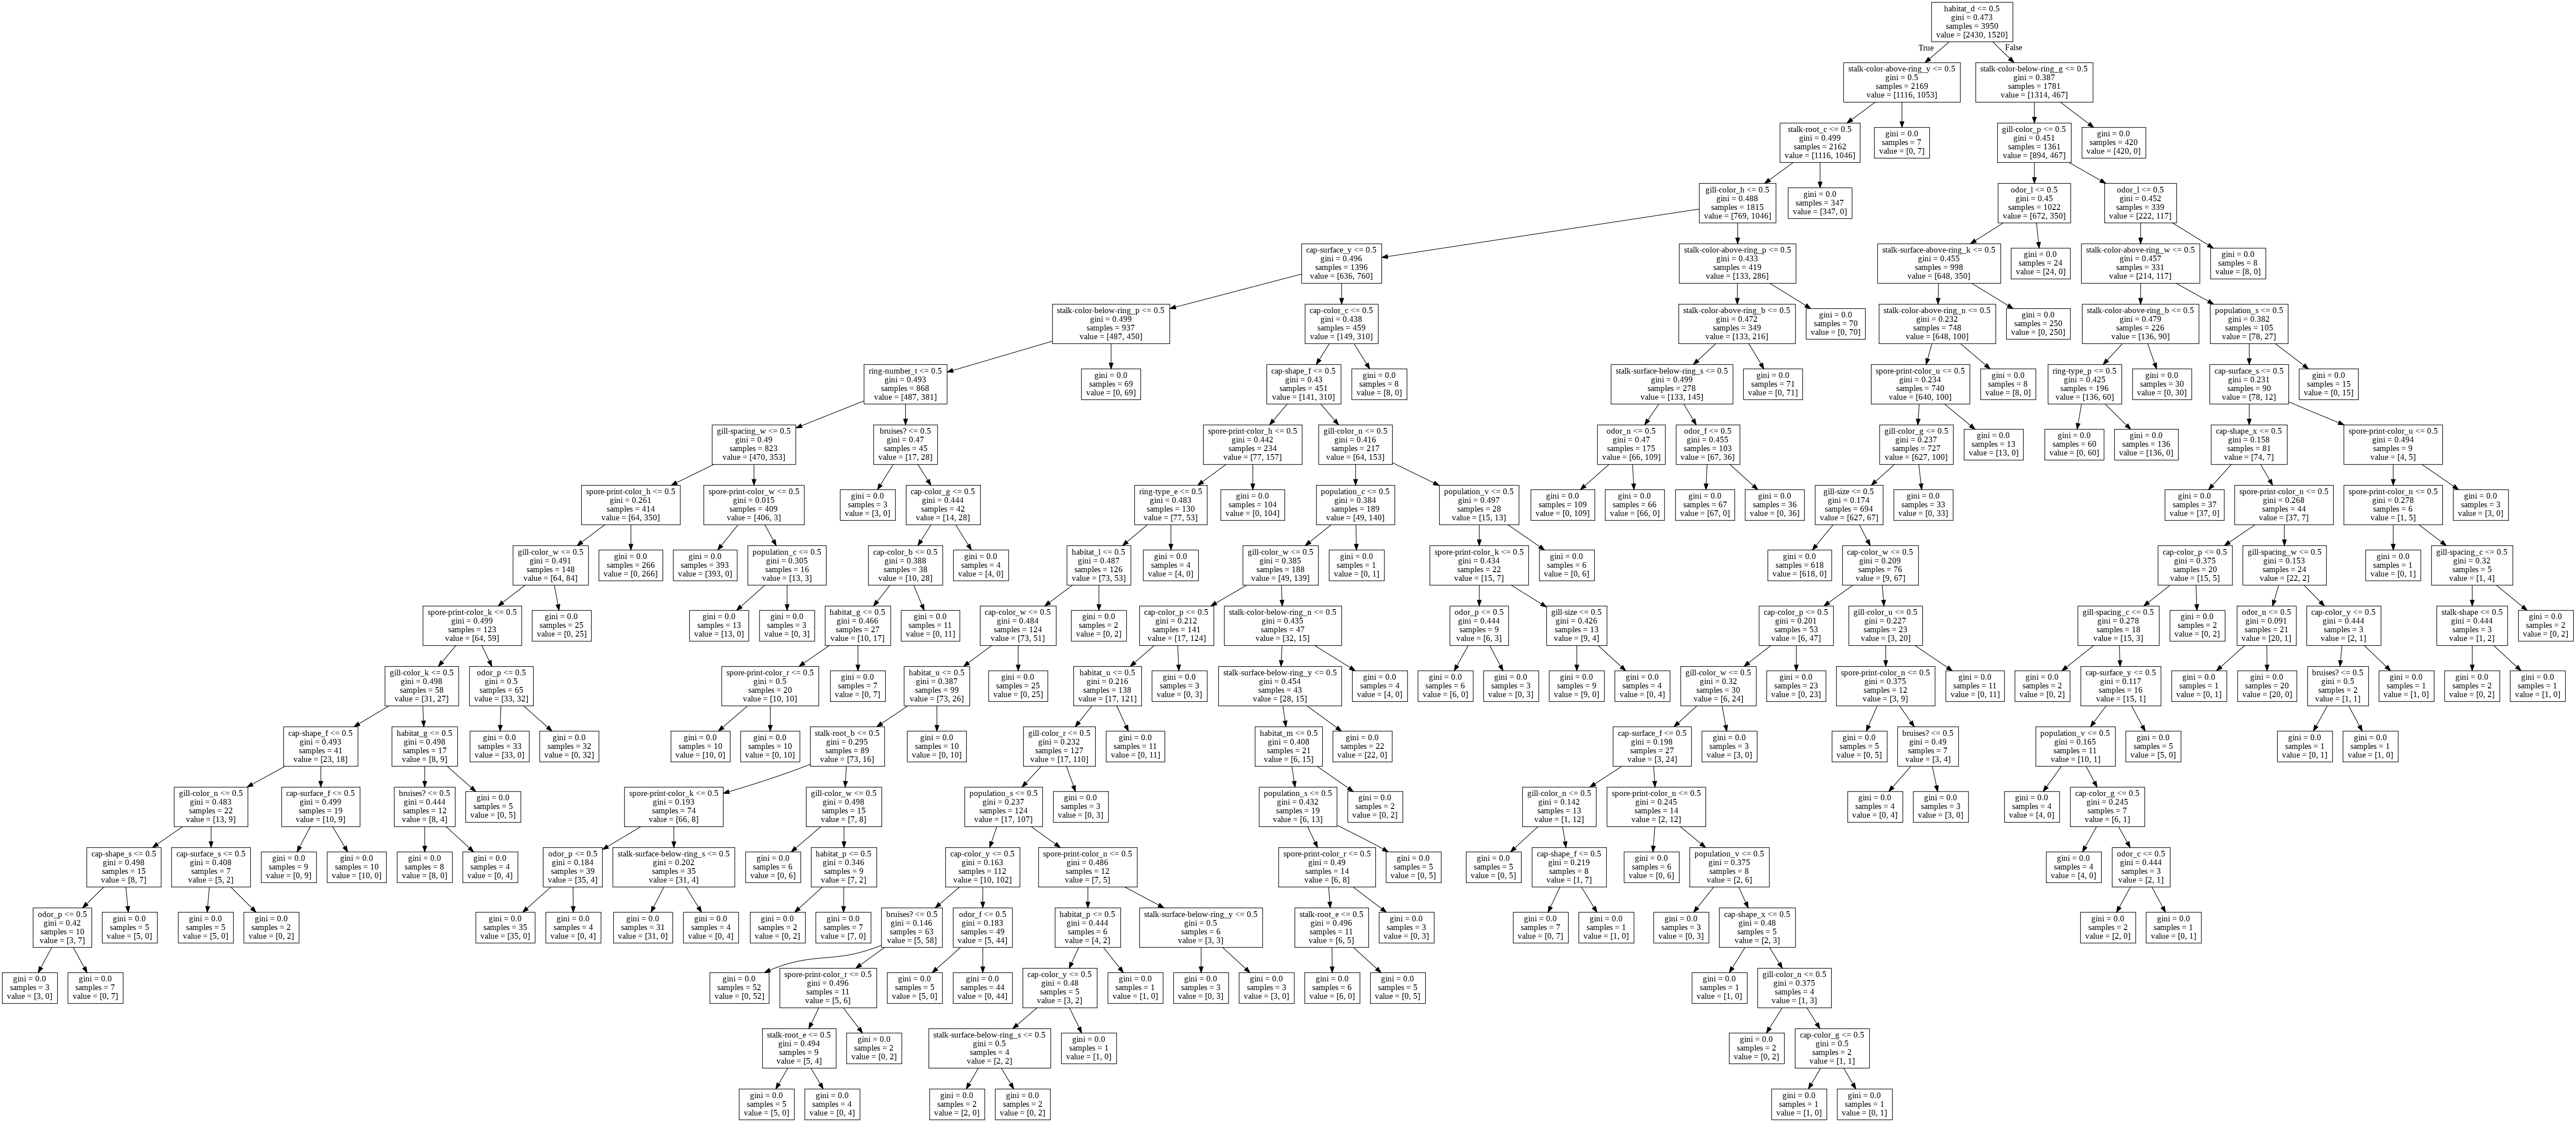

In [357]:
dt_example = DecisionTreeClassifier(max_features=1)

dt_example.fit(x_train, y_train)

dot_data = StringIO()
export_graphviz(dt_example, feature_names=x_train.columns, out_file=dot_data)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('/tree.png')
Image(graph.create_png())

- max_features 값을 수정하면서 validation을 진행했다.
- max_features 값에 변화에 따른 정확도의 변화는 일정하지 않았다.
- 특히 max_feature 값이 1일 때, 정확도가 1인 것이 흥미로워서 모델을 시각화해봤다. 그러나 tree의 depth가 매우 큰 것을 확인했다. 
- 따라서 한가지 parameter 로 최적화를 진행할 때의 위험성을 알 수 있었다.

### 1-3. 결과 및 최종 모델
- max_depth, max_features를 조합해서 최적의 모델을 찾아보자
- 100%의 정확도는 이미 default 모델이 가지고 있고, 결정트리에서 100%의 정확도는 overfitting이라 가정한다. overfitting은 모델이 복잡할 때 나타날 수 있고, 결정트리는 training data에 따라 구조가 민감하게 바뀌는 unstable 한 모델이기 때문이다.
- 따라서 최소 98%이상의 정확도를 가지면서 depth와 사용하는 feature는 최소화 하는 결정트리 모델을 생성해보자

In [358]:
m_depth_list = [4,5,6,7,8,9,10,11]
m_feature_list = [6,7,8,9,10, 11,12, 13, 14]
score= [[0]*9 for i in range(8)]

for m in m_depth_list:
  for n in m_feature_list: 
    kf = KFold(n_splits = 5)
    val_accuracy = np.array([])
    for train_index, val_index in  kf.split(x_train):
      x_train_cv, x_val_cv = x_train.iloc[train_index], x_train.iloc[val_index]
      y_train_cv, y_val_cv = y_train.iloc[train_index], y_train.iloc[val_index]

      dtree = DecisionTreeClassifier(max_depth=m, max_features=n,random_state=42)
      dtree.fit(x_train_cv, y_train_cv)
      accuracy = dtree.score(x_val_cv, y_val_cv)
      val_accuracy = np.append(val_accuracy, accuracy)

    mean_score = val_accuracy.mean()
    score[m-4][n-6]=mean_score
print(score)
  


[[0.9458227848101265, 0.909620253164557, 0.8881012658227847, 0.9620253164556962, 0.8875949367088609, 0.9141772151898735, 0.8944303797468354, 0.960506329113924, 0.9412658227848102], [0.9265822784810126, 0.9245569620253165, 0.9455696202531645, 0.9392405063291139, 0.9362025316455697, 0.9172151898734178, 0.8944303797468354, 0.9724050632911393, 0.9481012658227848], [0.9729113924050633, 0.9617721518987341, 0.970379746835443, 0.9762025316455697, 0.9835443037974683, 0.9630379746835442, 0.9655696202531645, 0.9870886075949367, 0.9518987341772152], [0.9946835443037975, 0.9607594936708861, 0.9711392405063292, 0.978987341772152, 0.9843037974683544, 0.9772151898734178, 0.9769620253164557, 0.9949367088607595, 0.9589873417721518], [0.9956962025316456, 0.9802531645569621, 0.9767088607594937, 0.9929113924050632, 0.9916455696202531, 0.9918987341772152, 0.9817721518987342, 0.9979746835443037, 0.9886075949367088], [0.9962025316455696, 0.9837974683544303, 0.9865822784810125, 0.9969620253164557, 0.9967088607

- max_depth가 7이고, max_feature가 6일 때 
정확도는 0.995 으로 98% 이상이 나온다.
- 이 parameter 로 만든 결정트리를 시각화 해보자 

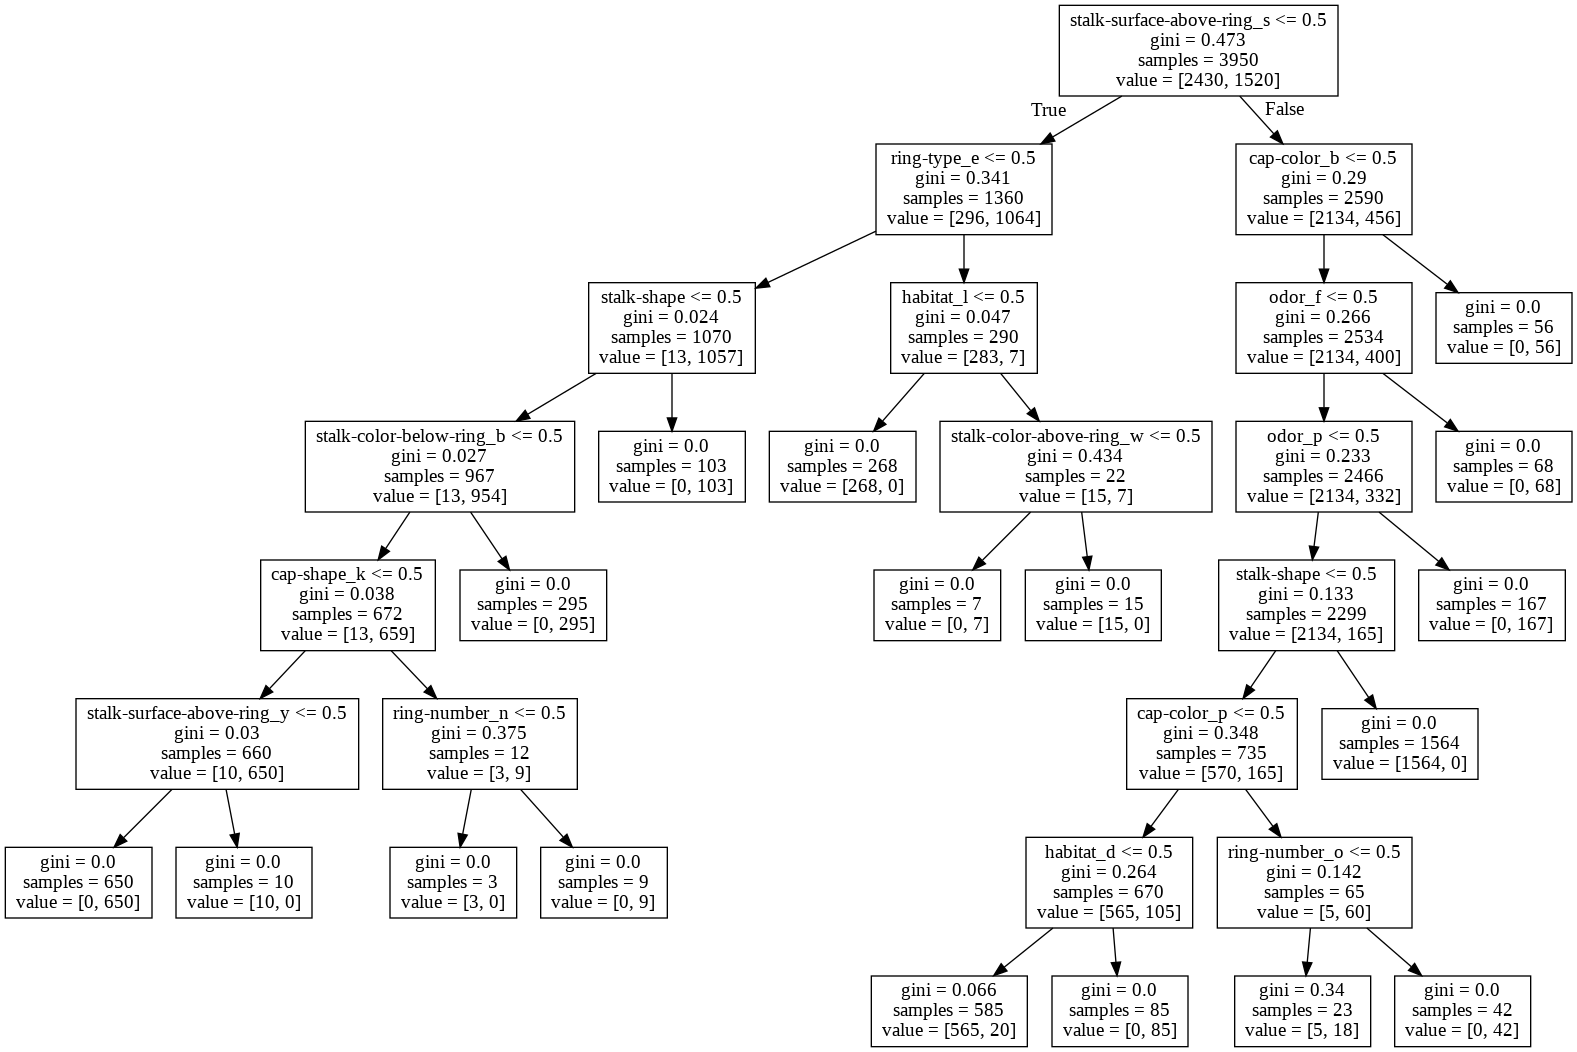

In [359]:
dt_final = DecisionTreeClassifier(max_depth=7,max_features=6, random_state=42)

dt_final.fit(x_train, y_train)

dot_data = StringIO()
export_graphviz(dt_final, feature_names=x_train.columns, out_file=dot_data)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('/tree.png')
Image(graph.create_png())

In [360]:
score= dt_final.score(x_test, y_test)
print(score)

0.9911452184179457


- 최종 decision tree의 정확도는 99.1%이다.

## 2. Logistic Regression

### 2-1.	Train data와 test data만을 이용하여 default 모델 생성 및 분석

In [361]:
from sklearn.linear_model import LogisticRegression
# 2. logistic regression model 생성하기
logistic = LogisticRegression()
logistic.fit(x_train, y_train.values.ravel())

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [362]:
print(logistic.score(x_test, y_test))


1.0


- default 모델의 test data에 대한 정확도는 100% 이다.
- logistic regression 모델은 해당 데이터셋을 잘 분류한다.

### 2-2. validation 과정
- 결정트리의 경우에서처럼 높은 정확도를 유지하면서 모델을 단순화해보자
- max_iter 파라미터를 조절해보자
- 5-fold-cross-validation 사용

In [363]:
# max_iter
m_iter_list= [10, 50, 100, 200, 500, 1000]
score = []
for m in m_iter_list:
   
  kf = KFold(n_splits = 5)
  val_accuracy = np.array([])
  for train_index, val_index in  kf.split(x_train):
    x_train_cv, x_val_cv = x_train.iloc[train_index], x_train.iloc[val_index]
    y_train_cv, y_val_cv = y_train.iloc[train_index], y_train.iloc[val_index]

    log= LogisticRegression(max_iter=m )
    log.fit(x_train_cv, y_train_cv.values.ravel())
    accuracy = log.score(x_val_cv, y_val_cv)
    val_accuracy = np.append(val_accuracy, accuracy)

  mean_score = val_accuracy.mean()
  score.append(mean_score)
print(score)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


[1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


### 2-3. 결과
- max_iter 값이 50 이하일 때는 정확도가 1이 나오기는 하지만, 값이 수렴 하기전에 iteration이 종료됨으로 인한 warning이 발생한다.
- 따라서 default 모델처럼 max_iter 값을 100으로 하는 것이 더 안정적이면서 높은 정확도를 유지한다.
- logistic regression 모델의 최종 정확도는 1이다.

## 3. Perceptron

### 3-1.	Train data와 test data만을 이용하여 default 모델 생성 및 분석

In [364]:
# 3. perceptron
from sklearn.linear_model import Perceptron

perceptron = Perceptron(random_state=0)
perceptron.fit(x_train, y_train.values.ravel())

Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=1.0,
           fit_intercept=True, max_iter=1000, n_iter_no_change=5, n_jobs=None,
           penalty=None, random_state=0, shuffle=True, tol=0.001,
           validation_fraction=0.1, verbose=0, warm_start=False)

In [365]:
perceptron.score(x_test, y_test)

0.999409681227863

- 정확도가 1에 가까운 것을 보니 perceptron 으로 data가 잘 분류가 되고 있음을 알 수 있다. 
- dataset이 linear한 특성을 가지고 있다고 유추할 수 있다.
- 이전 경우와 마찬가지로 정확도를 어느정도 유지하면서 모델의 복잡도를 낮춰보자
- cross-validation(k=5) 과정을 통해 max_iter parameter를 조정해보자 

In [366]:
# max_iter
m_iter_list= [1, 3, 10, 50, 100, 200, 500, 1000]
score = []
for m in m_iter_list:
   
  kf = KFold(n_splits = 5)
  val_accuracy = np.array([])
  for train_index, val_index in  kf.split(x_train):
    x_train_cv, x_val_cv = x_train.iloc[train_index], x_train.iloc[val_index]
    y_train_cv, y_val_cv = y_train.iloc[train_index], y_train.iloc[val_index]

    pct= Perceptron(max_iter=m , random_state=0)
    pct.fit(x_train_cv, y_train_cv.values.ravel())
    accuracy = pct.score(x_val_cv, y_val_cv)
    val_accuracy = np.append(val_accuracy, accuracy)

  mean_score = val_accuracy.mean()
  score.append(mean_score)
print(score)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_mo

[0.9992405063291139, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


### 3-3. 결과
- logisitc regression의 경우와 비슷하게, max_iter 값이 3 이하일 때는 정확도가 1에 가깝게 나오기는 하지만, 값이 수렴 하기전에 iteration이 종료됨으로 인한 warning이 발생한다.
- 따라서  max_iter 값을 10으로 하는 것이 더 안정적이면서 높은 정확도를 유지한다.
- perceptron 모델의 최종 정확도는 0.9994 이다. 

In [367]:
pct_final = Perceptron(max_iter=10,random_state=0)
pct_final.fit(x_train, y_train.values.ravel())
print(pct_final.score(x_test, y_test))

0.999409681227863


## 4. MLP Classifier

### 4-1.	Train data와 test data만을 이용하여 default 모델 생성 및 분석

In [368]:
# 4. MLP
from sklearn.neural_network import MLPClassifier

mlp_classifier = MLPClassifier(random_state=42)
mlp_classifier.fit(x_train, y_train.values.ravel())

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=42, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [369]:
mlp_classifier.score(x_test, y_test)

1.0

- MLPClassifier 또한 높은 정확도를 가지고 있다.
- hidden_layer_size 와 같은 파라미터를 조정해서 모델의 복잡도를 낮춰보자. 그러한 모델도 높은 정확도를 가진다면 default 모델은 overfitting 되었다고 할 수 있다.

### 4-2. validation 과정
- 높은 정확도를 유지하면서 모델을 단순화해보자. 즉, overfitting을 줄여보자
- max_iter, hidden_layer_size 파라미터를 조절해보자
- 10-fold cross-validation 사용

In [370]:
m_iter_list= [ 50, 100, 200]
m_hidden_layer_list=  [  5, 10, 50]
score1 = []
score2 = []
for m in m_iter_list:
   
  kf = KFold(n_splits = 10)
  val_accuracy = np.array([])
  for train_index, val_index in  kf.split(x_train):
    x_train_cv, x_val_cv = x_train.iloc[train_index], x_train.iloc[val_index]
    y_train_cv, y_val_cv = y_train.iloc[train_index], y_train.iloc[val_index]

    mlp = MLPClassifier(max_iter=m,random_state=42)
    mlp.fit(x_train, y_train.values.ravel())
    accuracy = mlp.score(x_val_cv, y_val_cv)
    val_accuracy = np.append(val_accuracy, accuracy)

  mean_score = val_accuracy.mean()
  score1.append(mean_score)
print(score1)

for m in m_hidden_layer_list:
   
  kf = KFold(n_splits = 10)
  val_accuracy = np.array([])
  for train_index, val_index in  kf.split(x_train):
    x_train_cv, x_val_cv = x_train.iloc[train_index], x_train.iloc[val_index]
    y_train_cv, y_val_cv = y_train.iloc[train_index], y_train.iloc[val_index]

    mlp = MLPClassifier(hidden_layer_sizes=(m,), random_state=42)
    mlp.fit(x_train, y_train.values.ravel())
    accuracy = mlp.score(x_val_cv, y_val_cv)
    val_accuracy = np.append(val_accuracy, accuracy)

  mean_score = val_accuracy.mean()
  score2.append(mean_score)
print(score2)

[1.0, 1.0, 1.0]
[1.0, 1.0, 1.0]


### 4-3. 결과
- default 모델의 max_iter 값은 200, hidden_layer_size 는 (100,) 이었다
- validation 을 해본 결과, max_iter를 50으로, hidden_layer_size를 (5,) 로 줄여도 정확도는 1을 유지했다.
- 따라서 파라미터를 이에 맞게 변경해서 MLPClassifier 모델을 생성했다.
- perceptron 으로 이미 정확도가 높기 때문에 MLP Classifier는 overfitting 된 모델일 가능성이 있다.

In [371]:
mlp_final = MLPClassifier(hidden_layer_sizes=(5,), max_iter=50, random_state=42)
mlp_final.fit(x_train, y_train.values.ravel())
print(mlp_final.score(x_test,y_test))
print(mlp_final.n_layers_)

1.0
3


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


- Convergence Warning이 발생하므로 max_iter 값을 높여서 모델을 다시 생성하자

In [372]:
mlp_final = MLPClassifier(hidden_layer_sizes=(5,), max_iter=100, random_state=42)
mlp_final.fit(x_train, y_train.values.ravel())
print(mlp_final.score(x_test,y_test))
print(mlp_final.n_layers_)

1.0
3


- 최종 모델의 test data에 대한 정확도는 1이고 hidden layer 개수는 3이다.

## 5. KNN Classifier

### 5-1.	Train data와 test data만을 이용하여 default 모델 생성 및 분석

In [373]:
# 5. knn classifier
from sklearn.neighbors import KNeighborsClassifier

knn_classifier = KNeighborsClassifier()
knn_classifier.fit(x_train, y_train.values.ravel())

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [374]:
knn_classifier.score(x_test, y_test)

1.0

- default 모델의 test data에 대한 정확도는 1이 나왔다.
- knn classifier 모델은 k 값에 따라 탐색하는 이웃 수가 달라진다.
- k값이 너무 작으면 지역성 특성을 너무 많이 반영해 overfitting 될 가능성이 크다. 반대로 k값이 너무 크면 underfitting 될 수 있다.
- 서로 다른 k 값에 대해 validation 과정을 진행해보자

### 5-2. validation 
- 5-fold cross-validation 사용

In [375]:
n_neighbors_list = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
score=[]

for k in n_neighbors_list: 
  kf = KFold(n_splits = 5)
  val_accuracy = np.array([])
  for train_index, val_index in  kf.split(x_train):
    x_train_cv, x_val_cv = x_train.iloc[train_index], x_train.iloc[val_index]
    y_train_cv, y_val_cv = y_train.iloc[train_index], y_train.iloc[val_index]

    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train_cv, y_train_cv.values.ravel())
    accuracy = knn.score(x_val_cv, y_val_cv)
    val_accuracy = np.append(val_accuracy, accuracy)

  mean_score = val_accuracy.mean()
  score.append(mean_score)

print(score)

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9989873417721519, 0.9989873417721519, 0.9982278481012659]


### 5-3. 결과 
- k를 1부터 10까지 변경해가면서 cross-validation을 진행하였다.
- k가 7에서 8이 되면서 정확도가 1보다 작아졌다.
- k가 8일때도 정확도가 매우 높긴 하지만 k=7 일때가 overfiting 을 줄이고 가장 정규화 되면서도 정확도 1을 가지기 때문에 최종 모델은 k=7 로 하였다.

In [376]:
#최종 knn 모델
knn_final = KNeighborsClassifier()
knn_final.fit(x_train, y_train.values.ravel())
score=knn_final.score(x_test, y_test)
print(score)

1.0


## 6. Random Forest

### 6-1.	Train data와 test data만을 이용하여 default 모델 생성 및 분석

In [377]:
# 6. randomforeset 
from sklearn.ensemble import RandomForestClassifier
forest_classifier = RandomForestClassifier( random_state=42)
forest_classifier.fit(x_train, y_train.values.ravel())

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [378]:
print("Random Forest Training Set Accuracy: {:.3f}".format(forest_classifier.score(x_train, y_train)))
print("Random Forest Test Set Accuracy: {:.3f}".format(forest_classifier.score(x_test, y_test)))

Random Forest Training Set Accuracy: 1.000
Random Forest Test Set Accuracy: 1.000


- default 모델의 정확도는 test data, train data에 대해 모두 1이다.

### 6-2. validaiton 을 통해 n_esimator 값에 따른 성능 변화를 분석해보자
- 5-fold cross-validation 사용

In [379]:
n_estimators_list = [5,10, 50, 100, 200, 500]
score=[]

for k in n_estimators_list: 
  kf = KFold(n_splits = 5)
  val_accuracy = np.array([])
  for train_index, val_index in  kf.split(x_train):
    x_train_cv, x_val_cv = x_train.iloc[train_index], x_train.iloc[val_index]
    y_train_cv, y_val_cv = y_train.iloc[train_index], y_train.iloc[val_index]

    rf = RandomForestClassifier(n_estimators=k)
    rf.fit(x_train_cv, y_train_cv.values.ravel())
    accuracy = rf.score(x_val_cv, y_val_cv)
    val_accuracy = np.append(val_accuracy, accuracy)

  mean_score = val_accuracy.mean()
  score.append(mean_score)

print(score)

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


- n_estimators 는 랜덤포레스트에 참여하는 결정트리의 개수를 의미한다. 따라서 n_estimators가 클수록 더 좋은 decision decision boundary가 나온다. 실제로 n_estimators=5 일 때는 정확도가 1보다 작은 것을 확인할 수 있다.
- 하지만 n_estimators 를 너무 크게 하면 필요한 메모리와 훈련시간이 증가하므로 default model 과 같이 n_estimators = 100 으로 한 모델을 최종 모델로 사용하자

In [380]:
rf_final = RandomForestClassifier(n_estimators= 100)
rf_final.fit(x_train, y_train.values.ravel())
rf_final.score(x_test,y_test)

1.0

### 6-3. 랜덤포레스트와 결정트리를 통한 feature의 중요도 확인

In [381]:
# feature 중요도 표현해주는 함수
import matplotlib.pyplot as plt

def plot_imp(clf):
  sorted_idx = clf.feature_importances_.argsort()
  y_ticks = np.arange(0, len(x.columns))
  fig, ax = plt.subplots()
  ax.barh(y_ticks, clf.feature_importances_[sorted_idx])
  ax.set_yticklabels(x.columns[sorted_idx])
  ax.set_yticks(y_ticks)
  fig.tight_layout()
  plt.show()


- feature_importances_ attribute 를 통해 결정트리와 랜덤포레스트에서 feature들의 중요도를 확인하자
- 결정트리는 max_features 파라미터를 조정하지 않은 default model을 사용하였다. 
- 중요도는 소수점 둘째자리까지 반올림하여 출력하였다.
- feature의 개수가 너무 많아 시각화함수로 feature 이름을 분간하기 어렵다. 중요도에 따라 feature 이름을 출력하였다. 가장 아래에 출력된 feature일 수록 중요도가 높다.

In [382]:
dt_imp = dt_classifier.feature_importances_ # feature importance
sorted_idx = dt_imp.argsort()
print("decision tree : feature importances ascending order\n")
for i in sorted_idx:
  print(x.columns[i])
print(dt_imp.round(2))

decision tree : feature importances ascending order

bruises?
stalk-color-below-ring_y
stalk-color-below-ring_w
stalk-color-below-ring_p
stalk-color-below-ring_n
stalk-color-below-ring_g
stalk-color-below-ring_c
stalk-color-below-ring_b
stalk-color-above-ring_y
stalk-color-above-ring_w
stalk-color-above-ring_p
stalk-color-above-ring_n
stalk-color-above-ring_g
stalk-color-above-ring_c
stalk-color-above-ring_b
stalk-surface-below-ring_y
stalk-surface-below-ring_s
stalk-surface-below-ring_k
stalk-surface-below-ring_f
stalk-surface-above-ring_s
veil-color_w
stalk-surface-above-ring_f
veil-color_y
ring-number_t
habitat_m
habitat_l
habitat_g
habitat_d
population_y
population_v
population_s
population_n
population_a
spore-print-color_w
spore-print-color_u
spore-print-color_r
spore-print-color_n
spore-print-color_k
spore-print-color_h
ring-type_p
ring-type_n
ring-type_l
ring-type_e
ring-number_n
stalk-root_r
stalk-surface-above-ring_k
stalk-root_c
stalk-root_e
cap-color_w
cap-color_p
cap-color

In [383]:
rf_imp =rf_final.feature_importances_ # feature importance
sorted_idx = rf_imp.argsort()
print("random forest : feature importances ascending order\n")
for i in sorted_idx:
  print(x.columns[i])
print(rf_imp.round(2))

random forest : feature importances ascending order

population_a
veil-type
gill-color_p
cap-shape_c
stalk-color-below-ring_g
gill-attachment_a
cap-surface_g
gill-attachment_f
stalk-color-above-ring_y
gill-color_k
stalk-color-above-ring_p
ring-type_n
cap-color_e
cap-color_c
stalk-color-above-ring_g
cap-shape_k
stalk-surface-above-ring_y
stalk-color-above-ring_c
veil-color_y
stalk-color-below-ring_y
stalk-color-below-ring_p
gill-color_y
veil-color_w
gill-color_u
cap-shape_s
gill-color_w
gill-color_n
cap-shape_f
habitat_l
gill-color_h
ring-number_n
spore-print-color_u
cap-color_g
cap-surface_y
gill-color_r
cap-shape_x
odor_m
stalk-surface-above-ring_f
stalk-color-below-ring_c
gill-color_g
population_s
stalk-root_r
habitat_p
stalk-color-above-ring_b
habitat_g
population_n
stalk-surface-below-ring_f
stalk-color-below-ring_b
cap-shape_b
stalk-surface-below-ring_y
cap-color_w
habitat_m
population_y
population_c
ring-number_t
cap-color_b
spore-print-color_w
stalk-color-above-ring_n
ring-numbe

- 결정트리 : 'odor_f', 'gill-size', 'stalk-shape', 'ring-number_o' 순으로 중요도가 높다. 한 두개의 feature가 중요도에서 매우 큰 비중을 차지한다.
- 랜덤포레스트 : 'spore-print-color_h', 'odor_n', 'odor_f', 'stalk-surface-below-ring_k', 'gill-size' 순으로 중요도가 높다. 비교적 여러 feature들이 골고루 중요도가 높다. 이는 앙상블 기법으로 여러 결정트리가 모델에 참여한 결과로 볼 수 있다.
- 아래 그림을 통해 둘의 차이를 확인할 수 있다.






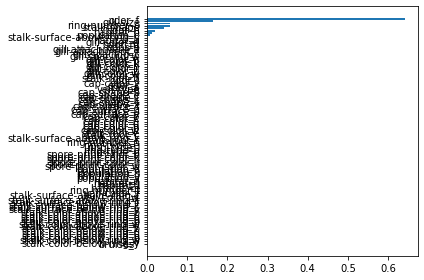

In [384]:
plot_imp(dt_classifier)

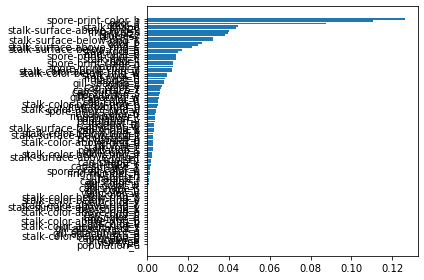

In [385]:
plot_imp(rf_final)

## 7. K-means Clustering


### 7-1. k-means 알고리즘으로 두 개의 cluster를 만들어보자

In [386]:
# 7. k-means clustering
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(x_train)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

- k-means 알고리즘으로 두 개의 cluster를 만들었다.
- test data에 대해서 cluster를 예측하고 label을 부여하자
- 그 예측된 label과 실제 data의 class를 비교하자

In [387]:
new_labels = kmeans.predict(x_test)
for i in range(0, 10):
  print(new_labels[i])

0
1
0
1
0
0
0
1
0
1


In [388]:
# y_test 인덱스가 0번지부터가 아니므로 numpy로 변환
y_test_array = y_test.to_numpy()
for i in range(0, 10):
  print(y_test_array[i])

[0]
[1]
[0]
[1]
[1]
[0]
[0]
[1]
[0]
[1]


- new_label과 실제 y_Test를 비교한 결과, 약간의 오차는 있지만 cluster의 label 넘버링과 실제 class 넘버링이 같다고 판단된다. 따라서 별도의 처리는 필요없다.


### 7-2. k-means 클러스터링으로 부여된 레이블과 랜덤 포레스트를 이용하여 예측된 레이블 비교 및 분석

-  k-means가 부여한 레이블과 실제 레이블 값에 cross-tabulation을 실행해보자. 

In [389]:
df = pd.DataFrame({'labels': new_labels, 'target': y_test_array.ravel()})
ct = pd.crosstab(df['labels'], df['target'])
print(ct)

target     0    1
labels           
0       1058  264
1          0  372


- 실제 레이블과 랜덤포레스트가 예측한 레이블을 사용하여 confusion matrix를 출력

In [390]:
new_labels_rf = rf_final.predict(x_test)
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, new_labels_rf)

array([[1058,    0],
       [   0,  636]])

### 7-3.결과
- 랜덤포레스트는 완벽하게 label을 예측한다. 그에 비해 clustering으로 예측한 lable은 오차가 비교적 크다.
- 특히 'edible' 레이블에 대해서는 정확도가 높지만 'poisonous'에 대해서는 정확도가 낮다. 즉, false negative가 크다. (poisonous 가 positive일 때)

## 8. 결론

- mushroom data로 여러 모델을 만들고 분석한 결과, 대부분의 모델이 정확도가 1이었다. 

- 이는 mushroom data의 feature space 에서 class 0과 1 간의 거리가 충분해서 인것으로 판단된다.
 
- 즉, 주어진 featured data로 식용 버섯과 독 버섯을 분류하기 매우 용이하다. 특히 perceptron에서도 1에 가까운 정확도가 나오는 것을 보아 data가 linear한 것으로 판단된다. 

- 이러한 데이터의 특성상 모델을 최적화하는 과정은 accuracy를 높이는 방향이 아니라 **최소한의 accuracy를 유지하면서 complexity를 낮추는** 방향으로 진행하였다. 즉, overfitting 정도를 줄이고자 하였다. train data 뿐만 아니라 test data에 대해서도 정확도가 높아도 모델 복잡성이 높다면 overfitting이라 할 수 있다.  PART2에서 각각의 모델에서 accuracy를 낮추지 않는 선에서 여러 모델 파라미터를 조정해봤다.

- PART 3에서 feature selection 기법을 적용하고 PART 4에서 전과 후를 비교해보자.
 필요없는 feature들을 drop 함으로써 complexity를 더욱 낮출 수 있을거라 기대된다.

#**PART 3. Feature Selection**

##  일변량 통계 기법(Selecting K best features)
- SelectKBest를 사용해 k 개의 중요한 feature 를 골라보자 

In [391]:
from sklearn.feature_selection import SelectKBest, chi2

# SelectKBest와 chi2 테스트를 사용하여 25개의 중요한 특성을 선택

select = SelectKBest( chi2, 25)
select.fit(x_train,  y_train.values.ravel())
x_train_selected = select.transform(x_train)

print(x_train.shape)
print(x_train_selected.shape)

(3950, 95)
(3950, 25)


In [392]:
# 테스트 데이터 변환
x_test_selected = select.transform(x_test)

new_dt = DecisionTreeClassifier()
new_dt.fit(x_train_selected, y_train.values.ravel())
new_dt.score(x_test_selected , y_test)

1.0

- 25개의 feature 만으로도 결정트리 모델이 높은 정확도를 보이므로
k=25 로 결정
- 이제 선택된 feature를 확인하고 시각화해보자 

In [393]:
mask = select.get_support()
print(mask)

selected = []
for i in range(0,95):
  if(mask[i]==True):
    selected.append(x_train.columns[i])
selected

[ True False  True False False False False False False False False False
 False False False False False False  True False False False False False
  True False False  True  True False False False False  True  True False
 False False False False False False False False False False False  True
  True False False  True  True False  True False  True  True False False
 False  True False  True  True False False False False False False False
 False  True  True False  True  True  True  True False False False False
 False False False False False False False False False  True False]


['bruises?',
 'stalk-shape',
 'cap-color_n',
 'odor_f',
 'odor_n',
 'odor_p',
 'gill-color_g',
 'gill-color_h',
 'stalk-surface-above-ring_k',
 'stalk-surface-above-ring_s',
 'stalk-surface-below-ring_k',
 'stalk-surface-below-ring_s',
 'stalk-color-above-ring_b',
 'stalk-color-above-ring_g',
 'stalk-color-above-ring_n',
 'stalk-color-below-ring_b',
 'stalk-color-below-ring_g',
 'stalk-color-below-ring_n',
 'ring-type_e',
 'ring-type_l',
 'ring-type_p',
 'spore-print-color_h',
 'spore-print-color_k',
 'spore-print-color_n',
 'habitat_p']

- selected 는 선택된 feature 들을 나타내는 리스트이다.
- one-hot 인코딩 되기 전 원래 feature 들을 고려하면 'bruises?', 'stalk-shape', 
 'odor', 'gill-color',
 'stalk-surface-above-ring_'... 등의 feature 들이 중요한 feature 였음을 알 수 있다.
- 아래는 원래 feature에서 25개의 선택된 feature의 비중을 시각화한 것이다.

([<matplotlib.axis.YTick at 0x7fa596d5f550>],
 <a list of 1 Text major ticklabel objects>)

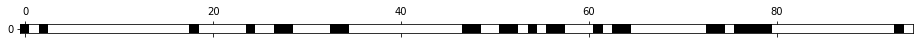

In [394]:
plt.matshow(mask.reshape(1, -1), cmap='gray_r')
plt.yticks([0])


#**PART 4. Feature Selection 전과 후 비교**
- 원래 95개의 feature를 모두 사용했을 때와 중요한 25개의 feature만을 사용했을 때의 비교를 모든 모델에 대해 진행
- _fs 은 feature selection 이 적용된 데이터를 사용함을 의미한다. 

## 1. Deicision Tree Classifier

### 1-1. train data와 test data만을 이용하여 default 모델 생성 및 분석



In [395]:
# decision tree classifier
dt_classifier_fs = DecisionTreeClassifier()

dt_classifier_fs.fit(x_train_selected, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [396]:
print(dt_classifier_fs.score(x_test_selected, y_test))

1.0


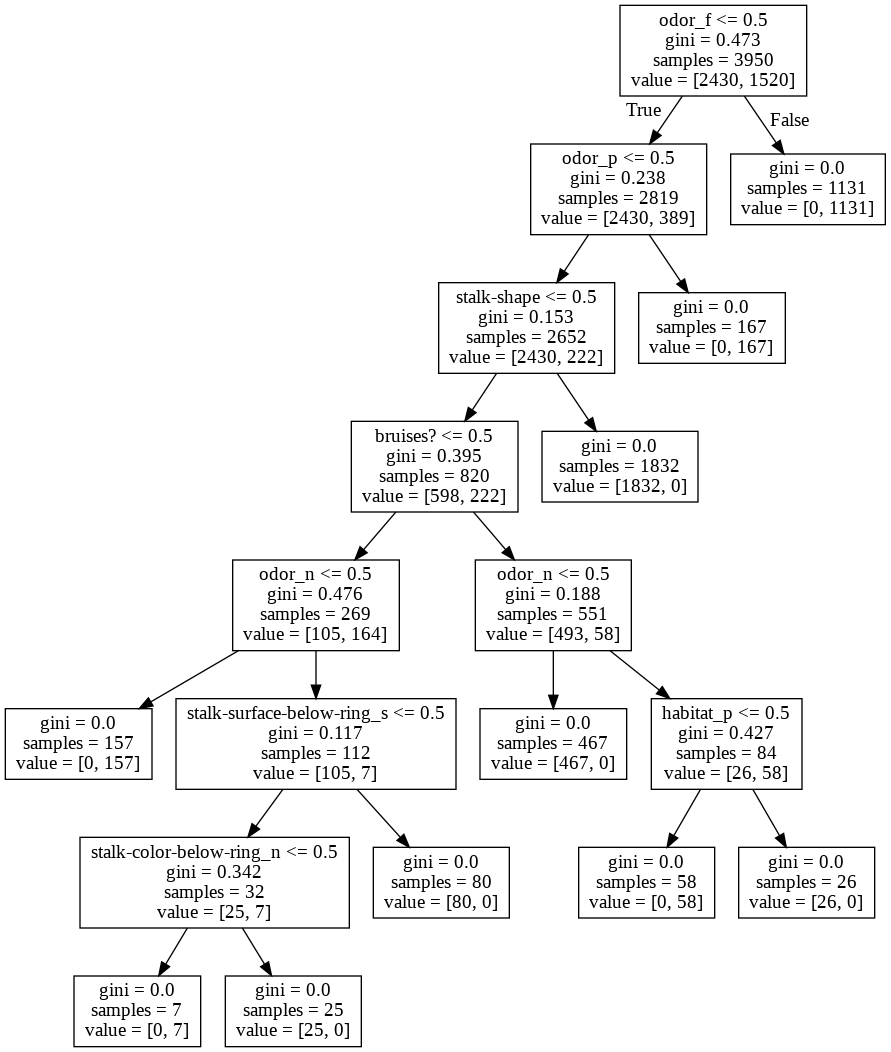

In [397]:
#  classifier 결정트리를 시각화해줍니다.
dot_data = StringIO()
export_graphviz(dt_classifier_fs, feature_names=selected, out_file=dot_data)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('/tree.png')
Image(graph.create_png())

- decision tree classifier 모델을 default로 생성하고 시각화했다. 
- train data로 훈련하고 test data로 성능을 평가했다. 정확도는 100%이다.
- feature selection 전과 비교했을 때, depth가 깊어진 모습이다. max_depth를 줄여도 정확도가 유지되는지 확인하자

### 1-2. validation 과정을 통해 최적의 max_depth 를 찾아보자
- cross-validation 사용 (k=5)


In [398]:
# max_depth
m_depth_list = [1, 2,3,4,5,6, 7, 8, 9]
score = []
for m in m_depth_list:
   
  kf = KFold(n_splits = 5)
  val_accuracy = np.array([])
  for train_index, val_index in  kf.split(x_train_selected):
    x_train_cv, x_val_cv = x_train.iloc[train_index], x_train.iloc[val_index]
    y_train_cv, y_val_cv = y_train.iloc[train_index], y_train.iloc[val_index]

    dtree = DecisionTreeClassifier(max_depth=m )
    dtree.fit(x_train_cv, y_train_cv)
    accuracy = dtree.score(x_val_cv, y_val_cv)
    val_accuracy = np.append(val_accuracy, accuracy)

  mean_score = val_accuracy.mean()
  score.append(mean_score)
print(score)

[0.9015189873417722, 0.939746835443038, 0.970632911392405, 0.9979746835443037, 1.0, 1.0, 1.0, 1.0, 1.0]


### 1-3. 결과
- max_depth 값을 수정하면서 validation을 진행하였다. 
- max_depth가 4일 때 정확도가 1에 매우 가까워지고, 5일 때부터는 계속1이다.
- 25개의 feature만 사용했음에도 모든 feature를 사용했을 때와 성능이 큰 차이가 없다. 따라서 feature selection을 성공적으로 적용함으로써 모델이 간단해지고 일반화 성능이 높아졌다고 할 수 있다.
- 최종 decision tree 모델과 테스트 데이터에 대한 성능은 다음과 같다. (0.9958)

In [399]:
dt_final_fs = DecisionTreeClassifier(max_depth=5)
dt_final_fs.fit(x_train_selected, y_train)
score = dt_final_fs.score(x_test_selected, y_test)
print(score)

0.9958677685950413


- 최종 결정트리 시각화

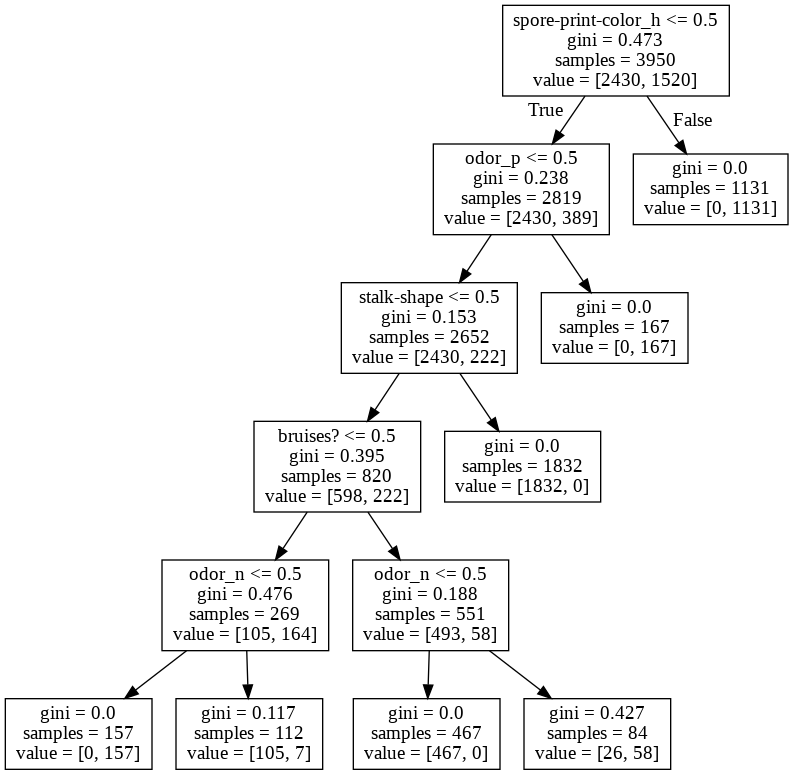

In [400]:
dot_data = StringIO()
export_graphviz(dt_final_fs, feature_names=selected, out_file=dot_data)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('/tree.png')
Image(graph.create_png())

## 2. Logistic Regression

### 2-1.	Train data와 test data만을 이용하여 default 모델 생성 및 분석

In [401]:
# 2. logistic regression model 생성하기
logistic_fs = LogisticRegression(random_state=42)
logistic_fs.fit(x_train_selected, y_train.values.ravel())


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [402]:
print(logistic_fs.score(x_test_selected, y_test))


1.0


- default 모델의 test data에 대한 정확도는 100% 이다.
- 25개의 feature 만으로도 정확도 100%를 보인다.

### 2-2. validation 과정
- 결정트리의 경우에서처럼 높은 정확도를 유지하면서 모델을 더 단순화해보자
- max_iter 파라미터를 조절해보자
- 5-fold-cross-validation 사용

In [403]:
# max_iter
m_iter_list= [10, 50, 100, 200, 500, 1000]
score = []
for m in m_iter_list:
   
  kf = KFold(n_splits = 5)
  val_accuracy = np.array([])
  for train_index, val_index in  kf.split(x_train_selected):
    x_train_cv, x_val_cv = x_train.iloc[train_index], x_train.iloc[val_index]
    y_train_cv, y_val_cv = y_train.iloc[train_index], y_train.iloc[val_index]

    log= LogisticRegression(max_iter=m , random_state=42)
    log.fit(x_train_cv, y_train_cv.values.ravel())
    accuracy = log.score(x_val_cv, y_val_cv)
    val_accuracy = np.append(val_accuracy, accuracy)

  mean_score = val_accuracy.mean()
  score.append(mean_score)
print(score)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


[1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


### 2-3. 결과
- PART2에서와 마찬가지로 max_iter 값이 50 이하일 때는 정확도가 1이 나오기는 하지만, 값이 수렴 하기전에 iteration이 종료됨으로 인한 warning이 발생한다.
- 따라서 default 모델처럼 max_iter 값을 100으로 하는 것이 더 안정적이면서 높은 정확도를 유지한다.
- logistic regression 모델의 최종 모델과 test data에 대한 성능은 다음과 같다. (1)

In [404]:
log_final_fs = LogisticRegression()
log_final_fs.fit(x_train_selected, y_train.values.ravel())
score = log_final_fs.score(x_test_selected, y_test)
print(score)

1.0


## 3. Perceptron

### 3-1.	Train data와 test data만을 이용하여 default 모델 생성 및 분석

In [405]:
# 3. perceptron
perceptron_fs = Perceptron(random_state=42)
perceptron_fs.fit(x_train_selected, y_train.values.ravel())

Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=1.0,
           fit_intercept=True, max_iter=1000, n_iter_no_change=5, n_jobs=None,
           penalty=None, random_state=42, shuffle=True, tol=0.001,
           validation_fraction=0.1, verbose=0, warm_start=False)

In [406]:
perceptron_fs.score(x_test_selected, y_test)

1.0

- 25개의 feature 만으로도 정확도가 100% 임을 확인했다.
- 이전경우와 마찬가지로 정확도를 어느정도 유지하면서 모델의 복잡도를 낮춰보자
- cross-validation(k=5) 과정을 통해 max_iter parameter를 조정해보자 

In [407]:
# max_iter
m_iter_list= [1, 3, 10, 50, 100, 200, 500, 1000]
score = []
for m in m_iter_list:
   
  kf = KFold(n_splits = 5)
  val_accuracy = np.array([])
  for train_index, val_index in  kf.split(x_train_selected):
    x_train_cv, x_val_cv = x_train.iloc[train_index], x_train.iloc[val_index]
    y_train_cv, y_val_cv = y_train.iloc[train_index], y_train.iloc[val_index]

    pct= Perceptron(max_iter=m ,random_state=42)
    pct.fit(x_train_cv, y_train_cv.values.ravel())
    accuracy = pct.score(x_val_cv, y_val_cv)
    val_accuracy = np.append(val_accuracy, accuracy)

  mean_score = val_accuracy.mean()
  score.append(mean_score)
print(score)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_mo

[0.9989873417721519, 0.9992405063291139, 0.999746835443038, 0.999746835443038, 0.999746835443038, 0.999746835443038, 0.999746835443038, 0.999746835443038]


### 3-3. 결과
- PART 2에서와 같이 max_iter 값이 3 이하일 때는 정확도가 1에 가깝게 나오기는 하지만, 값이 수렴 하기전에 iteration이 종료됨으로 인한 warning이 발생한다.
- 따라서  max_iter 값을 10으로 하는 것이 더 안정적이면서 높은 정확도를 유지한다.
- perceptron 모델의 최종 모델과 test data에 대한 성능은 다음과 같다. (1)

In [408]:
pct_final_fs = Perceptron(max_iter=10)
pct_final_fs.fit(x_train_selected, y_train.values.ravel())
print(pct_final_fs.score(x_test_selected, y_test))

1.0


## 4. MLP Classifier

### 4-1.	Train data와 test data만을 이용하여 default 모델 생성 및 분석

In [409]:
# 4. MLP
mlp_classifier_fs = MLPClassifier(random_state=42)
mlp_classifier_fs.fit(x_train_selected, y_train.values.ravel())

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=42, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [410]:
mlp_classifier_fs.score(x_test_selected, y_test)

1.0

- MLPClassifier 또한 25개만의 feature로도 높은 정확도를 가지고 있다.
- hidden_layer_size 와 같은 파라미터를 조정해서 모델의 복잡도를 낮춰보자. 즉, overfittng을 줄여보자.

### 4-2. validation 과정
- max_iter, hidden_layer_size 파라미터를 조절해보자
- 10-fold cross-validation 사용

In [411]:
m_iter_list= [ 50, 100, 200]
m_hidden_layer_list=  [  5, 10, 50]
score1 = []
score2 = []
for m in m_iter_list:
   
  kf = KFold(n_splits = 10)
  val_accuracy = np.array([])
  for train_index, val_index in  kf.split(x_train_selected):
    x_train_cv, x_val_cv = x_train.iloc[train_index], x_train.iloc[val_index]
    y_train_cv, y_val_cv = y_train.iloc[train_index], y_train.iloc[val_index]

    mlp = MLPClassifier(max_iter=m,random_state=42)
    mlp.fit(x_train, y_train.values.ravel())
    accuracy = mlp.score(x_val_cv, y_val_cv)
    val_accuracy = np.append(val_accuracy, accuracy)

  mean_score = val_accuracy.mean()
  score1.append(mean_score)
print(score1)

for m in m_hidden_layer_list:
   
  kf = KFold(n_splits = 10)
  val_accuracy = np.array([])
  for train_index, val_index in  kf.split(x_train_selected):
    x_train_cv, x_val_cv = x_train.iloc[train_index], x_train.iloc[val_index]
    y_train_cv, y_val_cv = y_train.iloc[train_index], y_train.iloc[val_index]

    mlp = MLPClassifier(hidden_layer_sizes=(m,),random_state=42)
    mlp.fit(x_train, y_train.values.ravel())
    accuracy = mlp.score(x_val_cv, y_val_cv)
    val_accuracy = np.append(val_accuracy, accuracy)

  mean_score = val_accuracy.mean()
  score2.append(mean_score)
print(score2)

[1.0, 1.0, 1.0]
[1.0, 1.0, 1.0]


### 4-3. 결과
- default 모델의 max_iter 값은 200, hidden_layer_size 는 (100,) 이었다
- validation 을 해본 결과, PART2에서처럼 max_iter를 50으로, hidden_layer_size를 (5,) 로 줄여도 정확도는 1을 유지했다.
- 따라서 파라미터를 이에 맞게 변경하자.
- 최종 MLPClassifier 모델과 test data에 대한 성능은 다음과 같다.

In [412]:
mlp_final_fs = MLPClassifier(hidden_layer_sizes=(5,), max_iter=50,random_state=42)
mlp_final_fs.fit(x_train_selected, y_train.values.ravel())
score = mlp_final_fs.score(x_test_selected,y_test)
print(score)
print(mlp_final_fs.n_layers_)

0.9858323494687131
3


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


- Convergence Warning이 발생하므로 max_iter 값을 높여서 모델을 다시 생성하자 (max_iter = 300)

In [413]:
mlp_final_fs = MLPClassifier(hidden_layer_sizes=(5,), max_iter=300, random_state=42)
mlp_final_fs.fit(x_train_selected, y_train.values.ravel())
score = mlp_final_fs.score(x_test_selected,y_test)
print(score)
print(mlp_final_fs.n_layers_)

1.0
3


- 최종 모델의 test data에 대한 정확도는 1이고 hidden layer 개수는 3이다.
- Convergence 를 위해 필요한 iteration 수가 PART 2 에서보다 커졌다. 이는 feature 개수가 줄어듬에 따라 최적의 모델을 찾는데 필요한 반복 수가 증가했기 때문이다.

## 5. KNN Classifier

### 5-1.	Train data와 test data만을 이용하여 default 모델 생성 및 분석

In [414]:
# 5. knn classifier
knn_classifier_fs = KNeighborsClassifier()
knn_classifier_fs.fit(x_train_selected, y_train.values.ravel())

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [415]:
knn_classifier_fs.score(x_test_selected, y_test)

1.0

- default 모델의 test data에 대한 정확도는 1이 나왔다.
- 다른 모델과 마찬가지로 25개의 feature만 사용했음에도 높은 정확도를 가진다.
- (PART 2에서처럼) 서로 다른 k 값에 대해 validation 과정을 진행해보자

### 5-2. validation 
- 5-fold cross-validation 사용

In [416]:
n_neighbors_list = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
score=[]

for k in n_neighbors_list: 
  kf = KFold(n_splits = 5)
  val_accuracy = np.array([])
  for train_index, val_index in  kf.split(x_train_selected):
    x_train_cv, x_val_cv = x_train.iloc[train_index], x_train.iloc[val_index]
    y_train_cv, y_val_cv = y_train.iloc[train_index], y_train.iloc[val_index]

    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train_cv, y_train_cv.values.ravel())
    accuracy = knn.score(x_val_cv, y_val_cv)
    val_accuracy = np.append(val_accuracy, accuracy)

  mean_score = val_accuracy.mean()
  score.append(mean_score)

print(score)

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9989873417721519, 0.9989873417721519, 0.9982278481012659]


### 5-3. 결과 
- k를 1부터 10까지 변경해가면서 cross-validation을 진행하였다.
- k가 7에서 8이 되면서 정확도가 1보다 작아졌다.
- (PART 2에서처럼) k가 8일때도 정확도가 매우 높긴 하지만 k=7 일때가 overfiting 을 줄이고 가장 정규화 되면서도 정확도 1을 가지기 때문에 최종 모델은 k=7 로 하였다.
- 25개의 feature 만으로 최적의 모델을 찾을 수 있다.

- 최종 KNN Classifier 모델과 test data에 대한 성능은 다음과 같다. (1)

In [417]:
# 최종 knn 모델
knn_final_fs = KNeighborsClassifier(n_neighbors=7)
knn_final_fs.fit(x_train_selected, y_train.values.ravel())
score=knn_final_fs.score(x_test_selected, y_test)
print(score)

1.0


## 6. Random Forest

### 6-1.	Train data와 test data만을 이용하여 default 모델 생성 및 분석

In [418]:
# 6. randomforeset 
forest_classifier_fs = RandomForestClassifier( random_state=42)
forest_classifier_fs.fit(x_train_selected, y_train.values.ravel())

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [419]:
print("Random Forest Training Set Accuracy: {:.3f}".format(forest_classifier_fs.score(x_train_selected, y_train)))
print("Random Forest Test Set Accuracy: {:.3f}".format(forest_classifier_fs.score(x_test_selected, y_test)))

Random Forest Training Set Accuracy: 1.000
Random Forest Test Set Accuracy: 1.000


- default 모델의 정확도는 test data, train data에 대해 모두 1이다.

### 6-2. validaiton 을 통해 n_esimator 값에 따른 성능 변화를 분석해보자
- 5-fold cross-validation 사용

In [420]:
n_estimators_list = [5,10, 50, 100, 200, 500]
score=[]

for k in n_estimators_list: 
  kf = KFold(n_splits = 5)
  val_accuracy = np.array([])
  for train_index, val_index in  kf.split(x_train_selected):
    x_train_cv, x_val_cv = x_train.iloc[train_index], x_train.iloc[val_index]
    y_train_cv, y_val_cv = y_train.iloc[train_index], y_train.iloc[val_index]

    rf = RandomForestClassifier(n_estimators=k)
    rf.fit(x_train_cv, y_train_cv.values.ravel())
    accuracy = rf.score(x_val_cv, y_val_cv)
    val_accuracy = np.append(val_accuracy, accuracy)

  mean_score = val_accuracy.mean()
  score.append(mean_score)

print(score)

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


- PART 2 에서처럼 n_estimators 를 조정해봤다.
- 25개의 feature로도 비슷한 성능을 보인다.
- 최종 random forest 모델과 test data에 대한 성능은 다음과 같다. (1)

In [421]:
rf_final_fs = RandomForestClassifier(n_estimators= 100)
rf_final_fs.fit(x_train_selected, y_train.values.ravel())
score = rf_final_fs.score(x_test_selected,y_test)
print(score)

1.0


### 6-3. 랜덤포레스트와 결정트리를 통한 feature의 중요도 확인

In [422]:
# feature 중요도 표현해주는 함수 (feature selection 적용된)


def plot_imp_fs(clf):
  sorted_idx = clf.feature_importances_.argsort()
  y_ticks = np.arange(0, len(selected))
  fig, ax = plt.subplots()
  ax.barh(y_ticks, clf.feature_importances_[sorted_idx])
  ax.set_yticklabels(np.array(selected)[sorted_idx])
  ax.set_yticks(y_ticks)
  fig.tight_layout()
  plt.show()


- (PART 2 에서처럼) feature_importances_ attribute 를 통해 결정트리와 랜덤포레스트에서 feature들의 중요도를 확인하자
- dt_final_fs, rf_final_fs 모델 사용 
- 중요도는 소수점 둘째자리까지 반올림하여 출력하였다.
- 위 함수를 이용해 feature들의 중요도를 확인하였다.

In [423]:
dt_imp_fs = dt_final_fs.feature_importances_ # feature importance
print(dt_imp_fs.round(2))

[0.05 0.05 0.   0.   0.1  0.14 0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.66 0.   0.   0.  ]


In [424]:
rf_imp_fs =rf_final_fs.feature_importances_ # feature importance
print(rf_imp.round(2))

[0.04 0.04 0.04 0.   0.   0.   0.   0.   0.   0.   0.01 0.   0.01 0.
 0.   0.   0.   0.   0.01 0.01 0.   0.01 0.01 0.03 0.11 0.01 0.   0.09
 0.03 0.   0.   0.01 0.01 0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.02 0.01 0.01 0.   0.   0.04 0.02 0.   0.   0.03 0.02 0.   0.   0.
 0.   0.   0.   0.01 0.   0.   0.   0.   0.01 0.   0.01 0.   0.   0.
 0.   0.01 0.   0.01 0.04 0.   0.02 0.13 0.01 0.01 0.01 0.   0.   0.
 0.   0.   0.   0.01 0.   0.01 0.   0.   0.   0.   0.01]


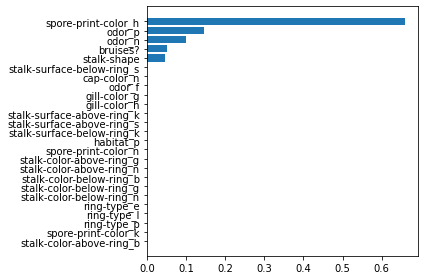

In [425]:
plot_imp_fs(dt_final_fs)

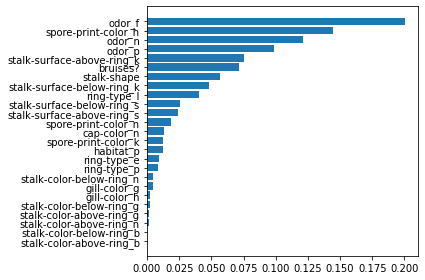

In [426]:
plot_imp_fs(rf_final_fs)

- 결정트리 : 'odor_f', 'odor_p', 'odor_n' 순으로 중요도가 높다. 두 세개의 feature가 중요도에서 매우 큰 비중을 차지한다.
- 랜덤포레스트 :  'odor_f', 'odor_n', 'spore-print-color_h', 'odor_p' 순으로 중요도가 높다. 비교적 여러 feature들이 골고루 중요도가 높다.
- 두 모델에서 'odor' 관련 feature들이 높은 중요도를 가지는 것으로 보아 식용 버섯과 독 버섯을 분류하는 데에 있어서 냄새가 매우 중요한 특성이라는 것을 유추할 수 있다.






## 7. K-means Clustering


### 7-1. k-means 알고리즘으로 두 개의 cluster를 만들어보자

In [427]:
# 7. k-means clustering
kmeans_fs = KMeans(n_clusters=2, random_state=42)
kmeans_fs.fit(x_train_selected)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

- k-means 알고리즘으로 두 개의 cluster를 만들었다.
- test data에 대해서 cluster를 예측하고 label을 부여하자
- 그 예측된 label과 실제 data의 class를 비교하자 (like PART 2)

In [428]:
new_labels_fs = kmeans_fs.predict(x_test_selected)
for i in range(0, 10):
  print(new_labels_fs[i])

0
1
0
1
0
0
0
1
0
1


In [429]:
# y_test 인덱스가 0번지부터가 아니므로 numpy로 변환
y_test_array = y_test.to_numpy()
for i in range(0, 10):
  print(y_test_array[i])

[0]
[1]
[0]
[1]
[1]
[0]
[0]
[1]
[0]
[1]


- new_label_fs 와 실제 y_Test를 비교한 결과, 약간의 오차는 있지만 cluster의 label 넘버링과 실제 class 넘버링이 같다고 판단된다. 따라서 별도의 처리는 필요없다.


### 7-2. k-means 클러스터링으로 부여된 레이블과 랜덤 포레스트를 이용하여 예측된 레이블 비교 및 분석

-  k-means가 부여한 레이블과 실제 레이블 값에 cross-tabulation을 실행해보자. 

In [430]:
df_fs = pd.DataFrame({'labels': new_labels_fs, 'target': y_test_array.ravel()})
ct_fs = pd.crosstab(df_fs['labels'], df['target'])
print(ct_fs)

target     0    1
labels           
0       1058  261
1          0  375


- 실제 레이블과 랜덤포레스트가 예측한 레이블을 사용하여 confusion matrix를 출력

In [431]:
new_labels_rf_fs = rf_final_fs.predict(x_test_selected)

confusion_matrix(y_test, new_labels_rf_fs)

array([[1058,    0],
       [   0,  636]])

### 7-3. 결과
- 랜덤포레스트는 완벽하게 label을 예측한다. 그에 비해 clustering으로 예측한 lable은 오차가 비교적 크다. 이는 PART 2에서와 유사하다.
- feature selection이 적용된 data에서 k-means clustering의 label은 PART 2에서보다 아주 미세하게 정확해졌다. 정확도는 높이고 feature 개수를 줄여서 복잡도는 줄였으므로 PART 2의 모델보다 더 최적의 Clustering 모델이라 할 수 있다.

## 8. 결론

- feature selection 기법을 적용해 feature를 95개에서 25개로 줄인 후, 모델을 생성하고 이전과 비교했다.
- 모든 모델에서 feature 개수가 약 1/4 감소했음에도 불구하고, 여전히 1에 가까운 정확도를 보였다.
- 이는 실제로 95개의 feature 가 모두 모델 학습에 중요한 것은 아니란 걸 의미한다. feature selection을 통해 모델의 정확도는 유지하면서 feature 개수를 줄일 수 있었다. 
- 모델의 complexity를 낮추고 일반화 성능을 높였다. 즉, overfitting 된 정도를 줄일 수 있었다.

# **PART 5. 실험 내용에 대한 전체 요약**

### 개요
- Mushroom data를 이용하여 여러 모델을 설계하고 분석했다.
- decision tree, logisti regression, perceptron, mlp, knn, random forest, k-means 의 총 7가지 모델을 설계했다.
- 일변량 통계 기법으로 feature selection을 진행했다.



### 내용 요약
- mushroom data는 거의 모든 모델에 대해서 정확도가 100%에 가까웠다. 기본적인 알고리즘의 default 모델에서 이미 정확도 100%라는 높은 성능이 나왔기 때문에 어떻게 최적화를 시킬지 몰라 실험에 어려움이 있었다.
- 그러나 최적의 모델이 무조건적으로 높은 정확도만을 의미하는 것이 아니라는 점에 착안해 모델의 complexity를 낮추고 모델의 복잡성으로 인한 overfitting을 해결하는 것을 실험의 주 목표로 삼았다.
- 모델 파라미터를 모델을 더 단순화하는 쪽으로 바꾸거나 feature의 개수를 줄인 데이터로 만든 모델 또한 높은 정확도를 가진다면 기존 모델은 과적합(overfitting) 된 것이라고 판단했다.
- 높은 정확도를 가지면서도 train data에 너무 과적합 되지 않는 모델을 만들기 위해 여러 파라미터들을 조정했다. 이때 k-fold cross-validaition을 주로 사용했다.
- SelectKBest 를 사용해 25개의 중요한 feature 만 가지고 모델들을 만들어 보았다. 25개의 feature 만으로도 충분히 좋은 성능을 가지는 모델들을 만들 수 있었다.
- k-means 알고리즘을 통해 만든 cluster가 실제 data의 label과 유사함을 확인했다.

# 추가 part 

**추가 파트 목적 및 설명** 
- mushroom data 특성상 기본적인 알고리즘으로도 test data에 대한 성능 100%가 나왔습니다.
- 이전 PART들에서 mushroom data를 가지고 (프로젝트 요구사항을 포함한) 최대한의 분석을 해봤지만 높은 정확도로 인해 각 알고리즘별로 성능 차이를 비교하기가 쉽지 않았습니다. 
- 알고리즘 간의 성능차이를 비교해 볼 필요가 있을 거 같아서 뒤늦게 별도의 새로운 파트를 추가해봤습니다. 
- 알고리즘 간의 성능 차이를 보기 위해서 성능이 조금 떨어지더라도 의도적으로 feature 개수를 많이 줄이고 진행합니다. 
- 알고리즘 간의 성능 차이 비교를 중점적으로 확인하기 위해서 모델 파라미터를 조정하는 과정은 생략하고 default 모델을 사용합니다.

### feature 개수 줄이기

- feature의 개수를 급격히 줄이고, 시각화를 하기위해서 odor 와 spore-print-color feature만 사용합니다. 
- one-hot-인코딩을 하면 두개의 feature 만으로는 표현력이 너무 떨어지므로 label 인코딩 된 데이터를 사용합니다.

In [432]:
#odor 와 spore-print-color만 사용
y= int_dt[['class']]
x=int_dt[['odor','spore-print-color']]
# 새로운 test, train data
x_train_2, x_test_2, y_train_2, y_test_2 = train_test_split(x, y, test_size=.3, random_state=42, )

In [433]:
x

,odor,spore-print-color
0,6,1
1,0,2
2,3,2
3,6,1
4,5,2
...,...,...
7986,5,5
8001,5,5
8038,5,5
8095,4,5


- 'odor_f', 'spore-print-color_h'  feature 만 가지고 모델들을 만들어보겠습니다.

In [434]:
#1. 결정트리
dt_2 = DecisionTreeClassifier(random_state=42)
dt_2.fit(x_train_2, y_train_2.values.ravel())
#2. logistic regression
log_2 = LogisticRegression(random_state=42)
log_2.fit(x_train_2, y_train_2.values.ravel())
#3. perceptron
pct_2 = Perceptron(random_state=42)
pct_2.fit(x_train_2, y_train_2.values.ravel())
#4. mlp (max_iter 값 늘림)
mlp_2 = MLPClassifier(random_state=42, max_iter=700)
mlp_2.fit(x_train_2, y_train_2.values.ravel())
#5. knn
knn_2 = KNeighborsClassifier()
knn_2.fit(x_train_2, y_train_2.values.ravel())
#6. random forest
rf_2 = RandomForestClassifier(random_state=42, n_estimators=100)
rf_2.fit(x_train_2, y_train_2.values.ravel())
#7. k-means
km_2 = KMeans(n_clusters=2, random_state=42)
km_2.fit(x_train_2, y_train_2.values.ravel())

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

In [435]:
score_dt = dt_2.score(x_test_2, y_test_2.values.ravel() )
score_log = log_2.score(x_test_2, y_test_2.values.ravel() )
score_pct = pct_2.score(x_test_2, y_test_2.values.ravel() )
score_mlp = mlp_2.score(x_test_2, y_test_2.values.ravel() )
score_knn = knn_2.score(x_test_2, y_test_2.values.ravel() )
score_rf = rf_2.score(x_test_2, y_test_2.values.ravel() )
print(score_dt, score_log, score_pct,score_mlp, score_knn, score_rf)

0.9982290436835891 0.8713105076741441 0.8311688311688312 0.9982290436835891 0.9982290436835891 0.9982290436835891


**결과**
- 두 가지 feature 만으로도 대부분 모델에서 높은 성능을 보입니다.
- 결정트리, mlp, knn, random forest 모델은 test data에 대한 정확도가 99.8% 로 같습니다.
- perceptron 모델의 정확도는 83%로 비교적 낮습니다. mlp 모델과 성능 차이가 있는 것으로 보아, 두개의 feature만 가지는 mushroom data는 non-linear 하다고 유추할 수 있습니다.
- logistic regression 모델의 정확도는 87%로, 다른 non_linear 모델들 보다는 정확도가 낮지만 perceptron 보다는 좋은 성능을 보입니다. 이는 logistic regression의 출력값이 0과 1사이의 확률 값이기 때문에 perceptron 보다 우리 데이터의 class를 예측하기 유리하기 때문입니다.

In [436]:
# cluster 에 label 부여
new_labels_2 = km_2.predict(x_test_2)
for i in range(0, 10):
  print(new_labels_2[i])

1
0
1
0
0
1
1
0
1
0


In [437]:
# y_test 인덱스가 0번지부터가 아니므로 numpy로 변환
y_test_array2 = y_test_2.to_numpy()
for i in range(0, 10):
  print(y_test_array2[i])

[0]
[1]
[0]
[1]
[1]
[0]
[0]
[1]
[0]
[1]


In [438]:
new_labels_cor = np.empty(y_test_2.values.ravel().shape)
for i in range(len(new_labels_2)):
  if new_labels_2[i]==0:
    new_labels_cor[i]=1
  elif new_labels_2[i]==1:
    new_labels_cor[i]=0
df = pd.DataFrame({'labels': new_labels_cor, 'target': y_test_2.values.ravel()})
ct = pd.crosstab(df['labels'], df['target'])
print(ct)

target    0    1
labels          
0.0     794  118
1.0     264  518


- k-means 알고리즘으로 생성된 클러스터를 바탕으로 test data label을 부여합니다.
- 실제 test data의 label과 비교해본 결과 label 넘버링이 다르므로 올바르게 매핑합니다.
- 실제 레이블 값과 k-means가 부여한 레이블에 corss tabulation을 합니다.
- 두 가지 feature 만 사용한 결과 클러스터와 실제 레이블이 일치하는 비율이 적어졌습니다. 그러나 feature 개수를 대폭 줄인점을 감안하면 준수한 결과라고 생각됩니다.

### cluster 및 decision boundary 시각화

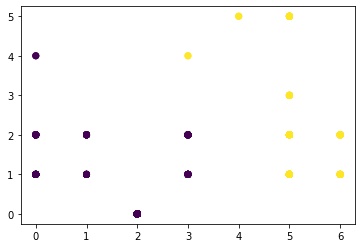

In [439]:
# cluster 시각화
x_data, y_data = np.array(x_test_2), np.array(y_test_2)
plt.scatter(x_data[:,0], x_data[:,1], c= new_labels_2, alpha=0.5)
plt.show()

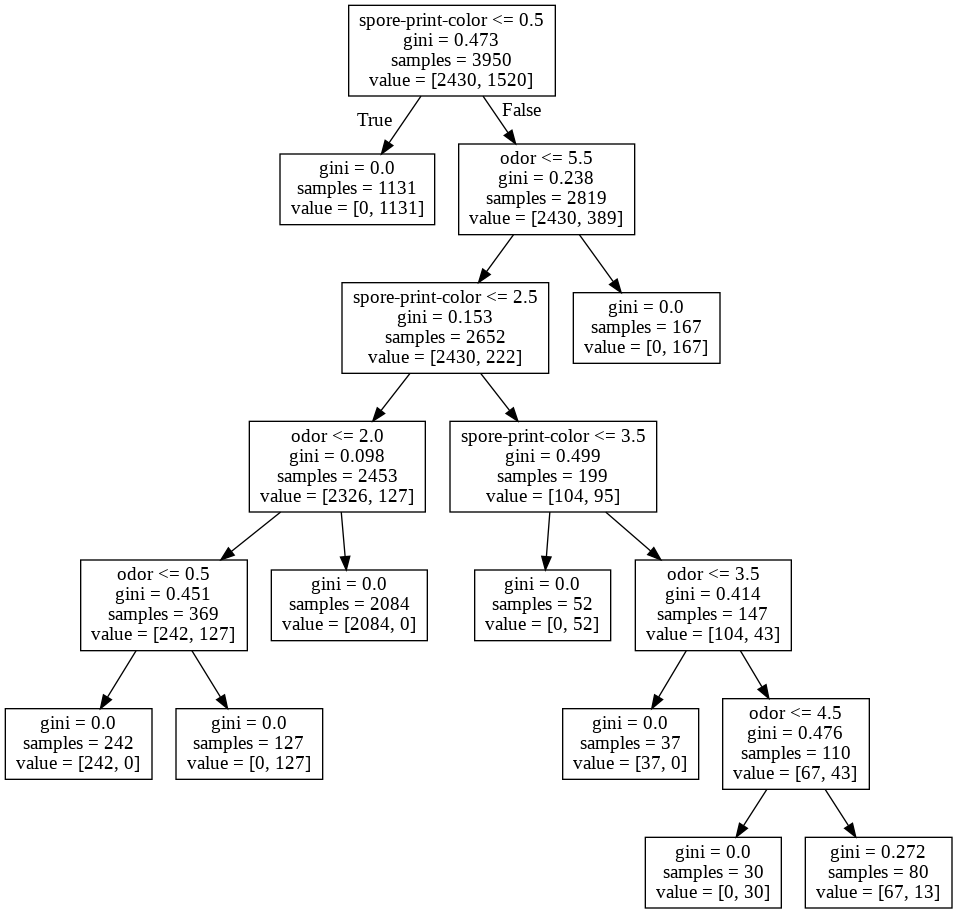

In [440]:
# 결정트리 시각화
dot_data = StringIO()
export_graphviz(dt_2, feature_names=x_train_2.columns, out_file=dot_data)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('/tree.png')
Image(graph.create_png())

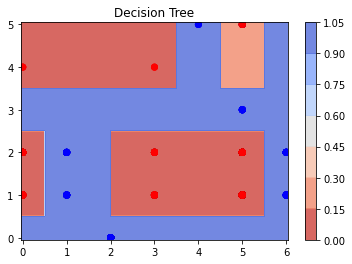

In [441]:
from matplotlib.colors import ListedColormap
# decision boundary를 그려주는 함수입니다.
# 함수 출처: http://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html
def plot_decision_boundary(classifier, X, y, title):
  xmin, xmax = np.min(X[:, 0]) - 0.05, np.max(X[:, 0]) + 0.05
  ymin, ymax = np.min(X[:, 1]) - 0.05, np.max(X[:, 1]) + 0.05
  step = 0.01
  cm = plt.cm.coolwarm_r
  thr = 0.0
  xx, yy = np.meshgrid(np.arange(xmin - thr, xmax + thr, step), np.arange(ymin - thr, ymax + thr, step))
  if hasattr(classifier, 'decision_function'):
    Z = classifier.decision_function(np.hstack((xx.ravel()[:, np.newaxis], yy.ravel()[:, np.newaxis])))
  else:
    Z = classifier.predict_proba(np.hstack((xx.ravel()[:, np.newaxis], yy.ravel()[:, np.newaxis])))[:, 1]
  Z = Z.reshape(xx.shape)
  plt.contourf(xx, yy, Z, cmap=cm, alpha=0.8)
  plt.colorbar()
  plt.scatter(X[:, 0], X[:, 1], c=y, cmap=ListedColormap(['#FF0000', '#0000FF']), alpha=0.6)
  plt.xlim(xmin, xmax)
  plt.ylim(ymin, ymax)
  plt.xticks((0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0))
  plt.yticks((0.0, 1.0, 2.0, 3.0, 4.0, 5.0))
  plt.title(title)
x_data, y_data = np.array(x_test_2), np.array(y_test_2)

plot_decision_boundary(dt_2, x_data, y_data, "Decision Tree")

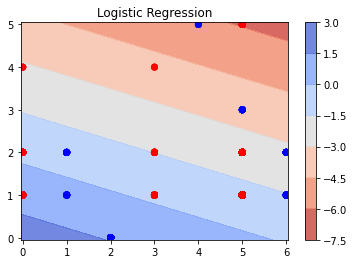

In [442]:
# logistic regression
plot_decision_boundary(log_2, x_data, y_data, "Logistic Regression")

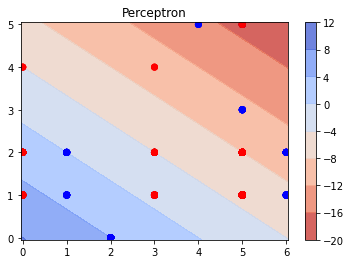

In [443]:
# perceptron 시각화

plot_decision_boundary(pct_2, x_data, y_data, "Perceptron")

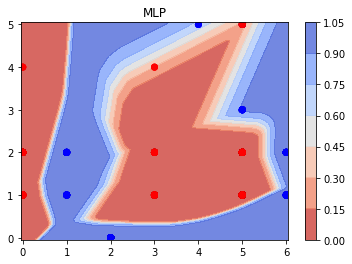

In [444]:
# mlp 시각화
plot_decision_boundary(mlp_2, x_data, y_data, "MLP")

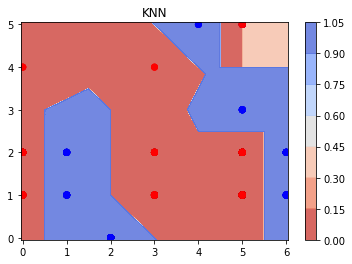

In [445]:
# knn 시각화
plot_decision_boundary(knn_2, x_data, y_data, "KNN")

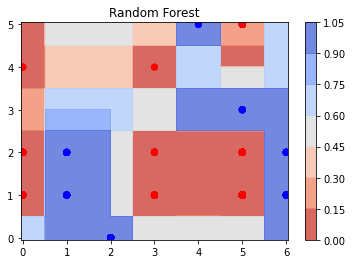

In [446]:
# random forest 시각화
plot_decision_boundary(rf_2, x_data, y_data, "Random Forest")

시각화 자료 분석 결과
- 2차원 feature space에 대해 decision boundary를 확인해본 결과, 수업시간에 배운대로 그림들이 나왔다.
- logistic regression 과 perceptorn은 decision boundary가 linear 하다. 모델이 단순하지만 실제 타겟을 완벽하게 분류하지 못한다. data가 non-linear한 특성을 가지고 있기 때문이다.
- mlp classifier 의 decision boundary는 non-linear하고 복잡하다. hidden layer를 거치면서 새로운 feature space를 만들어가기 때문이다. data를 거의 완벽하게 분류해낸다.
- 결정트리 decision boundary는 결정트리의 특성상 수직, 수평의 선으로 이루어져 있다. data를 거의 완벽하게 분류해내는 모습이다.
- random forest의 decision boundary는 결정트리에서와 비슷하다. 그러나 여러개의 결정트리가 모델에 참여했다는 점에서 다르다. 그림에서도 결정경계가 결정트리보다 더 복잡한 것을 확인할 수있다.
- knn classifier 의 decision boundary는 non-linear하다. 그림에 결정 경계는 k개의 이웃한 instance를 통해 data를 분류하는 knn의 특성을 잘 보여준다.
- k-means 알고리즘을 통해 생성된 두 클러스터를 시각화 하였다. k-means 알고리즘은 feature space 상에서 instance 간의 거리를 기준으로 clustering을 하는데 그 기준에 맞게 cluster가 잘 만들어 진것을 확인할 수 있었다.
그러나 다른 모델의 시각화 그림과 비교해보면 알 수 있듯이, 각각의 클러스터가 실제 class 레이블과는 완벽하게는 일치하지 않는 모습이다.